In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import median_abs_deviation

In [2]:
def plot_props(df):
    row = 0
    col = 0
    
    fig, axes = plt.subplots(3, 4, figsize=(20, 10))
    count = 0
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'pink', 'purple', 'grey', 'brown', 'lime', 'skyblue']
    
    while row < 3:
        for prop in ['B', 'Mn', 'K', 'N', 'P', 'Cu', 'S', 'OC', 'Zn', 'pH', 'EC', 'Fe']:
            print(f"{prop} min and max values :  Min = {df[prop].min()}, Max = {df[prop].max()}")
            
            sns.histplot(df[prop], bins=20, ax=axes[row][col], kde=True, kde_kws=dict(cut=3), color=colors[count], edgecolor="black")
            axes[row][col].set_title(f"Distribution of {prop}")
            axes[row][col].set_xlabel(f'{prop} values')
            axes[row][col].set_ylabel('Count')
            count += 1
            col = (col+1) % 4
    
            if count % 4 == 0 and count > 0:
                row += 1
    
    plt.tight_layout()
    plt.show()

In [8]:
# Function to calculate Modified Z-Score
def modified_z_score(series):
    median = np.median(series)
    mad = median_abs_deviation(series)
    epsilon = 1e-9 if mad == 0 else 0  # Adjust small value if necessary
    mad += epsilon
    # if mad == 0:  # Use standard deviation if MAD is zero
        # std_dev = np.std(series, ddof=1)
        # return (series - median) / std_dev if std_dev > 0 else series * 0
    # print(median, mad)
    return 0.6745 * (series - median) / mad

def apply_z_filter(df):
    df = df[df['OC'] >= 0.0]
    df = df[df['OC'] <= 1.0]
    df = df[df['pH'] >= 1.0]
    df = df[df['pH'] <= 14.0]
    
    threshold = 3.5
    props = ['B', 'Mn', 'K', 'P', 'Cu', 'S', 'OC', 'Zn', 'EC', 'Fe']
    # for prop in ['N', 'P', 'K']:
    for prop in props:
        df = df[df[prop] >= 0]
        # print(np.abs(modified_z_score(df[prop])))
        df = df[np.abs(modified_z_score(df[prop])) <= threshold]
        # print(f"After normalizing {prop} : size of df {len(df)}")
        # plot_props(df)

    return df

In [9]:
os.listdir("./data/2023-24")

['SIKKIM_2023_24.csv',
 'DADRA_&_NAGAR_HAVELI_AND_DAMAN_&_DIU_2023_24.csv',
 'PUNJAB_2023_24.csv',
 'LADAKH_2023_24.csv',
 'HARYANA_2023_24.csv',
 'MIZORAM_2023_24.csv',
 'CHHATTISGARH_2023_24.csv',
 '.ipynb_checkpoints',
 'TELANGANA_2023_24.csv',
 'ASSAM_2023_24.csv',
 'TRIPURA_2023_24.csv',
 'UTTAR_PRADESH_2023_24.csv',
 'ANDAMAN_&_NICOBAR_2023_24.csv',
 'RAJASTHAN_2023_24.csv',
 'ANDHRA_PRADESH_2023_24.csv',
 'MANIPUR_2023_24.csv',
 'GUJARAT_2023_24.csv',
 'ODISHA_2023_24.csv',
 'MAHARASHTRA_2023_24.csv',
 'PUDUCHERRY_2023_24.csv',
 'MEGHALAYA_2023_24.csv',
 'JAMMU_&_KASHMIR_2023_24.csv',
 'MADHYA_PRADESH_2023_24.csv',
 'KERALA_2023_24.csv',
 'NAGALAND_2023_24.csv',
 'WEST_BENGAL_2023_24.csv',
 'UTTARAKHAND_2023_24.csv',
 'GOA_2023_24.csv',
 'BIHAR_2023_24.csv',
 'TAMIL_NADU_2023_24.csv',
 'KARNATAKA_2023_24.csv',
 'ARUNACHAL_PRADESH_2023_24.csv',
 'HIMACHAL_PRADESH_2023_24.csv',
 'JHARKHAND_2023_24.csv']

Total districts : 18


/home/aakash01/Documents/MTP-2/webscraping/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/aakash01/Documents/MTP-2/webscraping/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_235944/1121506890.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("district", group_keys=False).apply(apply_z_filter)


District : FAZILKA
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0094, Max = 4.547
K min and max values :  Min = 0.342590976, Max = 1826.93056
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 0.044705024, Max = 160.58398720000002
Cu min and max values :  Min = 0.0, Max = 4.05
S min and max values :  Min = 0.0385, Max = 161.0
OC min and max values :  Min = 0.024, Max = 0.996
Zn min and max values :  Min = 0.0064, Max = 2.113
pH min and max values :  Min = 5.14, Max = 9.24
EC min and max values :  Min = 0.14, Max = 1.42
Fe min and max values :  Min = 0.0881, Max = 12.08


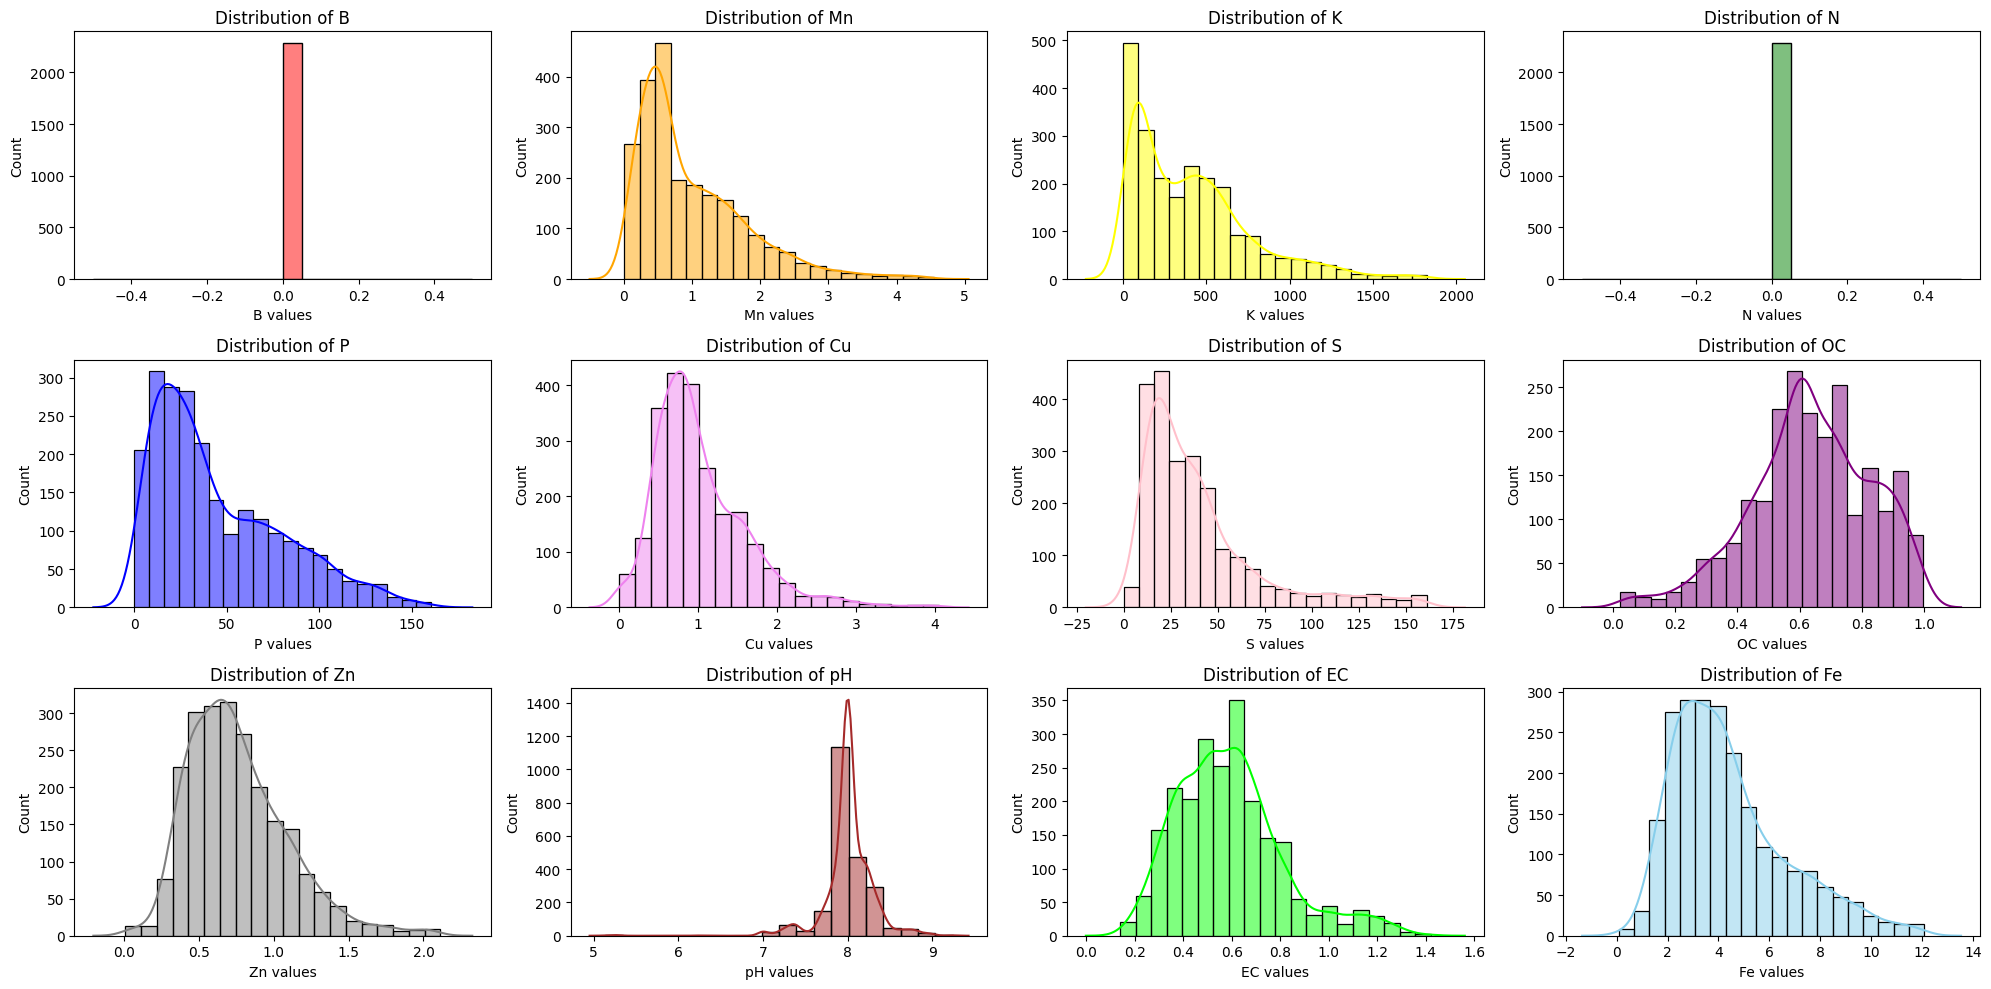

District : MALERKOTLA
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0214, Max = 36.75
K min and max values :  Min = 1.09, Max = 211.3
N min and max values :  Min = 0.0, Max = 100.53
P min and max values :  Min = 0.09, Max = 121.09
Cu min and max values :  Min = 0.0012, Max = 3.181
S min and max values :  Min = 0.3506, Max = 74.77
OC min and max values :  Min = 0.375, Max = 0.81
Zn min and max values :  Min = 0.0, Max = 4.623
pH min and max values :  Min = 6.7, Max = 9.2
EC min and max values :  Min = 0.12, Max = 0.96
Fe min and max values :  Min = 0.0, Max = 35.41


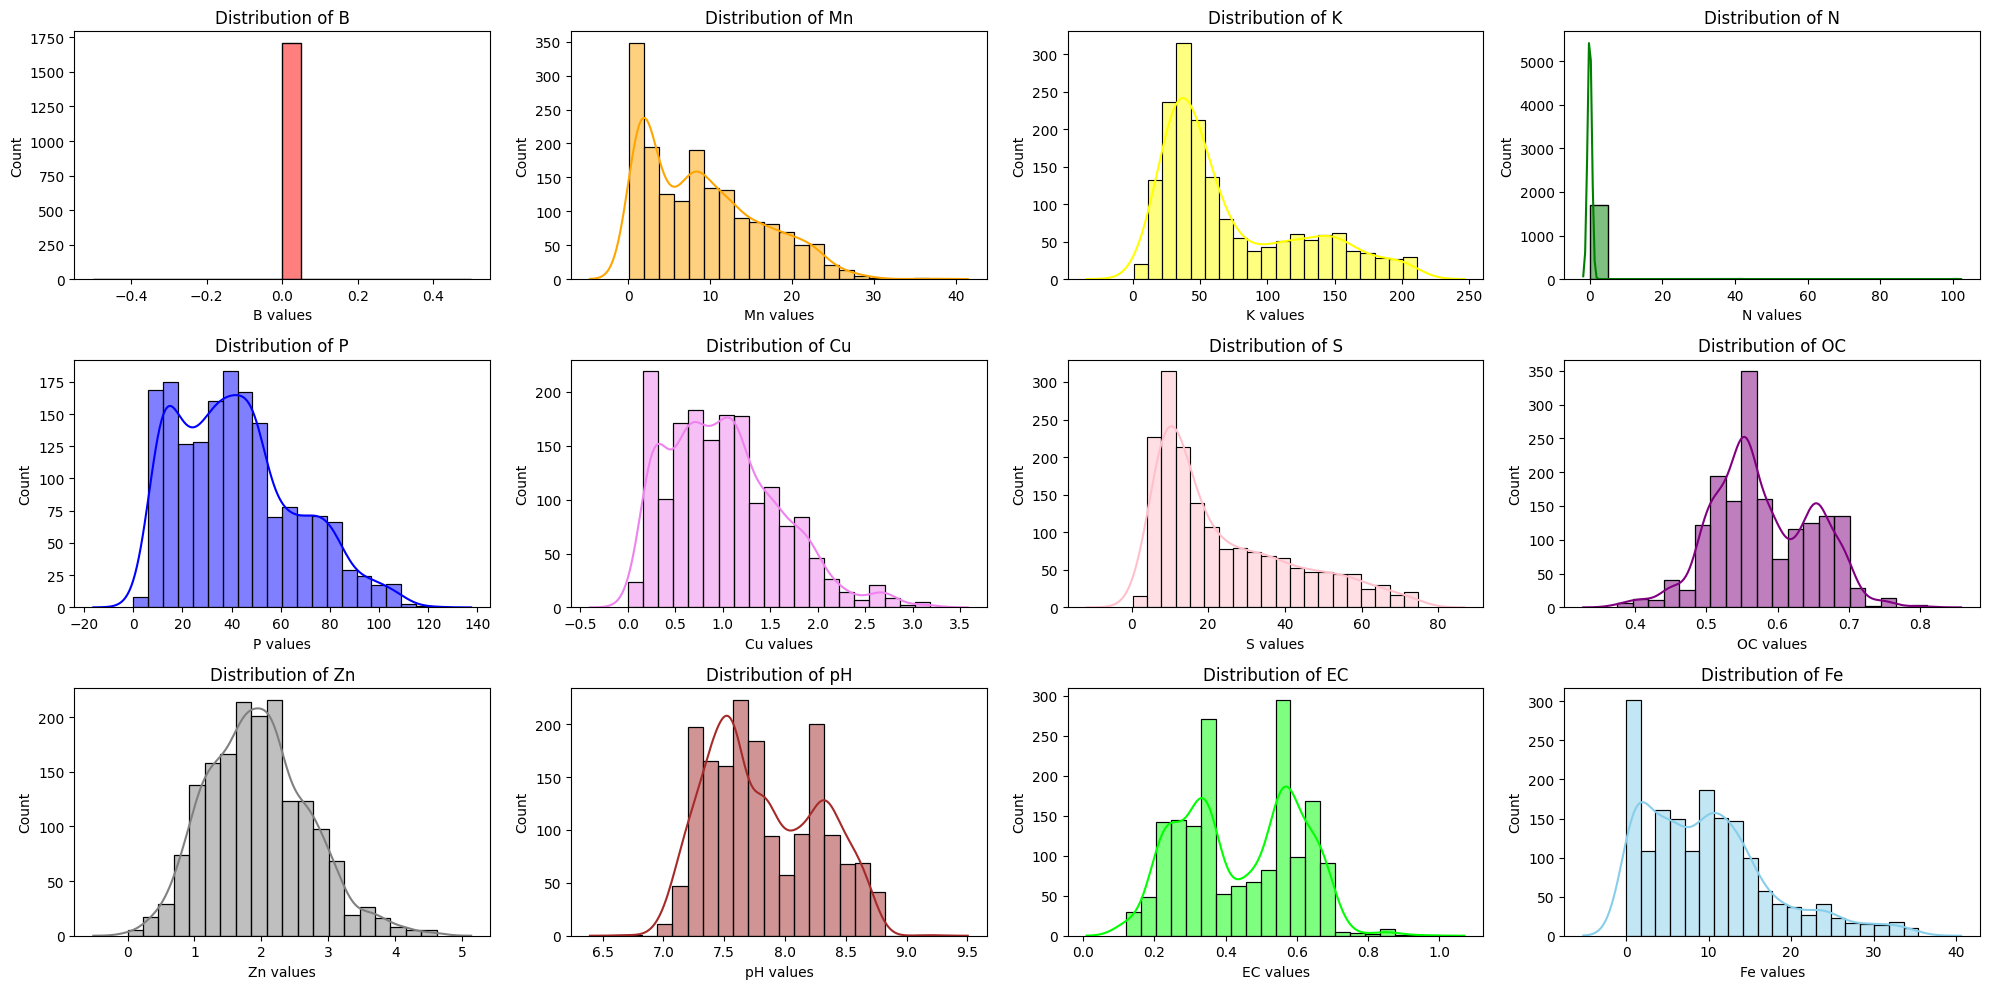

District : FARIDKOT
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0195, Max = 1.73
K min and max values :  Min = 2.506112, Max = 368.928
N min and max values :  Min = 0.0, Max = 0.66
P min and max values :  Min = 0.0275968, Max = 26.880000000000003
Cu min and max values :  Min = 0.0762, Max = 2.512
S min and max values :  Min = 0.1062, Max = 79.69
OC min and max values :  Min = 0.0, Max = 0.99
Zn min and max values :  Min = 0.0087, Max = 4.283
pH min and max values :  Min = 6.6, Max = 9.4
EC min and max values :  Min = 0.09, Max = 1.06
Fe min and max values :  Min = 0.2, Max = 21.48


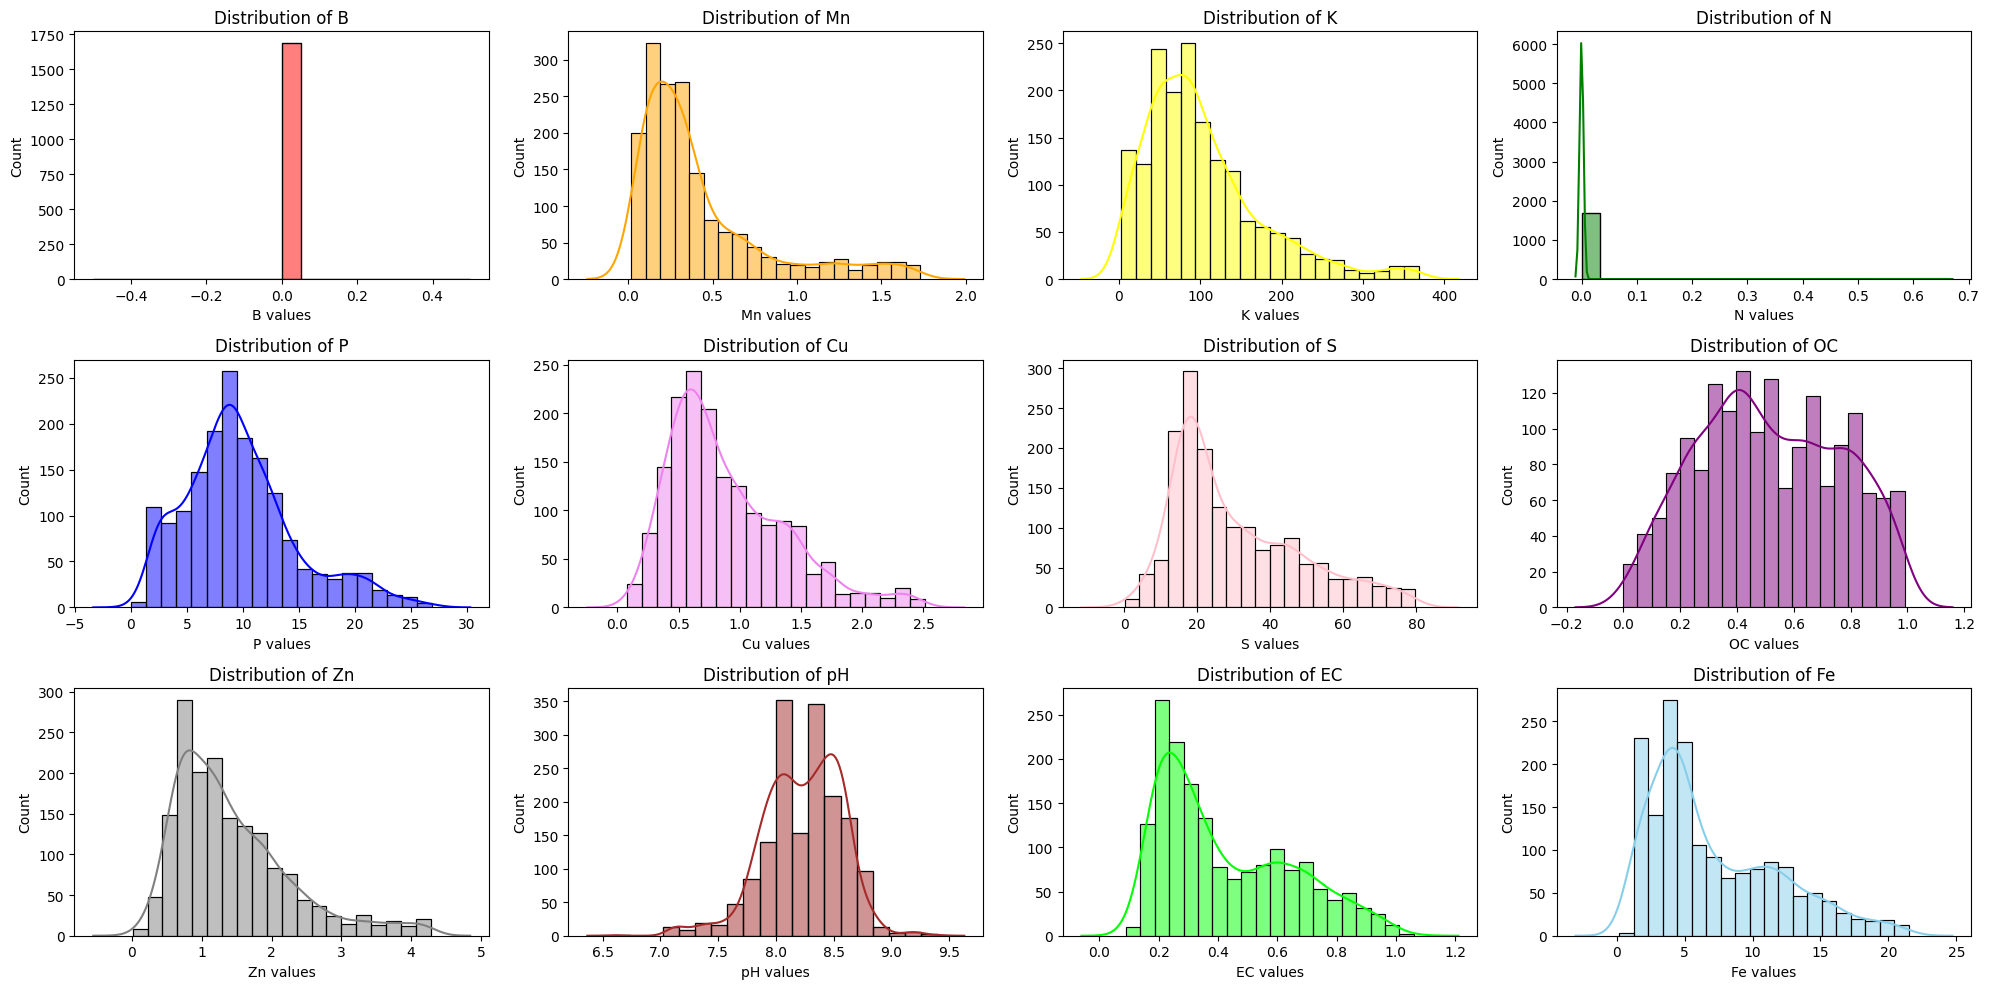

District : FEROZEPUR
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.021, Max = 3.904
K min and max values :  Min = 1.959552, Max = 281.7
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 0.0466816, Max = 28.87808
Cu min and max values :  Min = 0.002, Max = 6.266
S min and max values :  Min = 0.1347, Max = 134.7
OC min and max values :  Min = 0.165, Max = 0.995
Zn min and max values :  Min = 0.0028, Max = 2.327
pH min and max values :  Min = 7.49, Max = 9.82
EC min and max values :  Min = 0.21, Max = 0.99
Fe min and max values :  Min = 0.1378, Max = 23.7


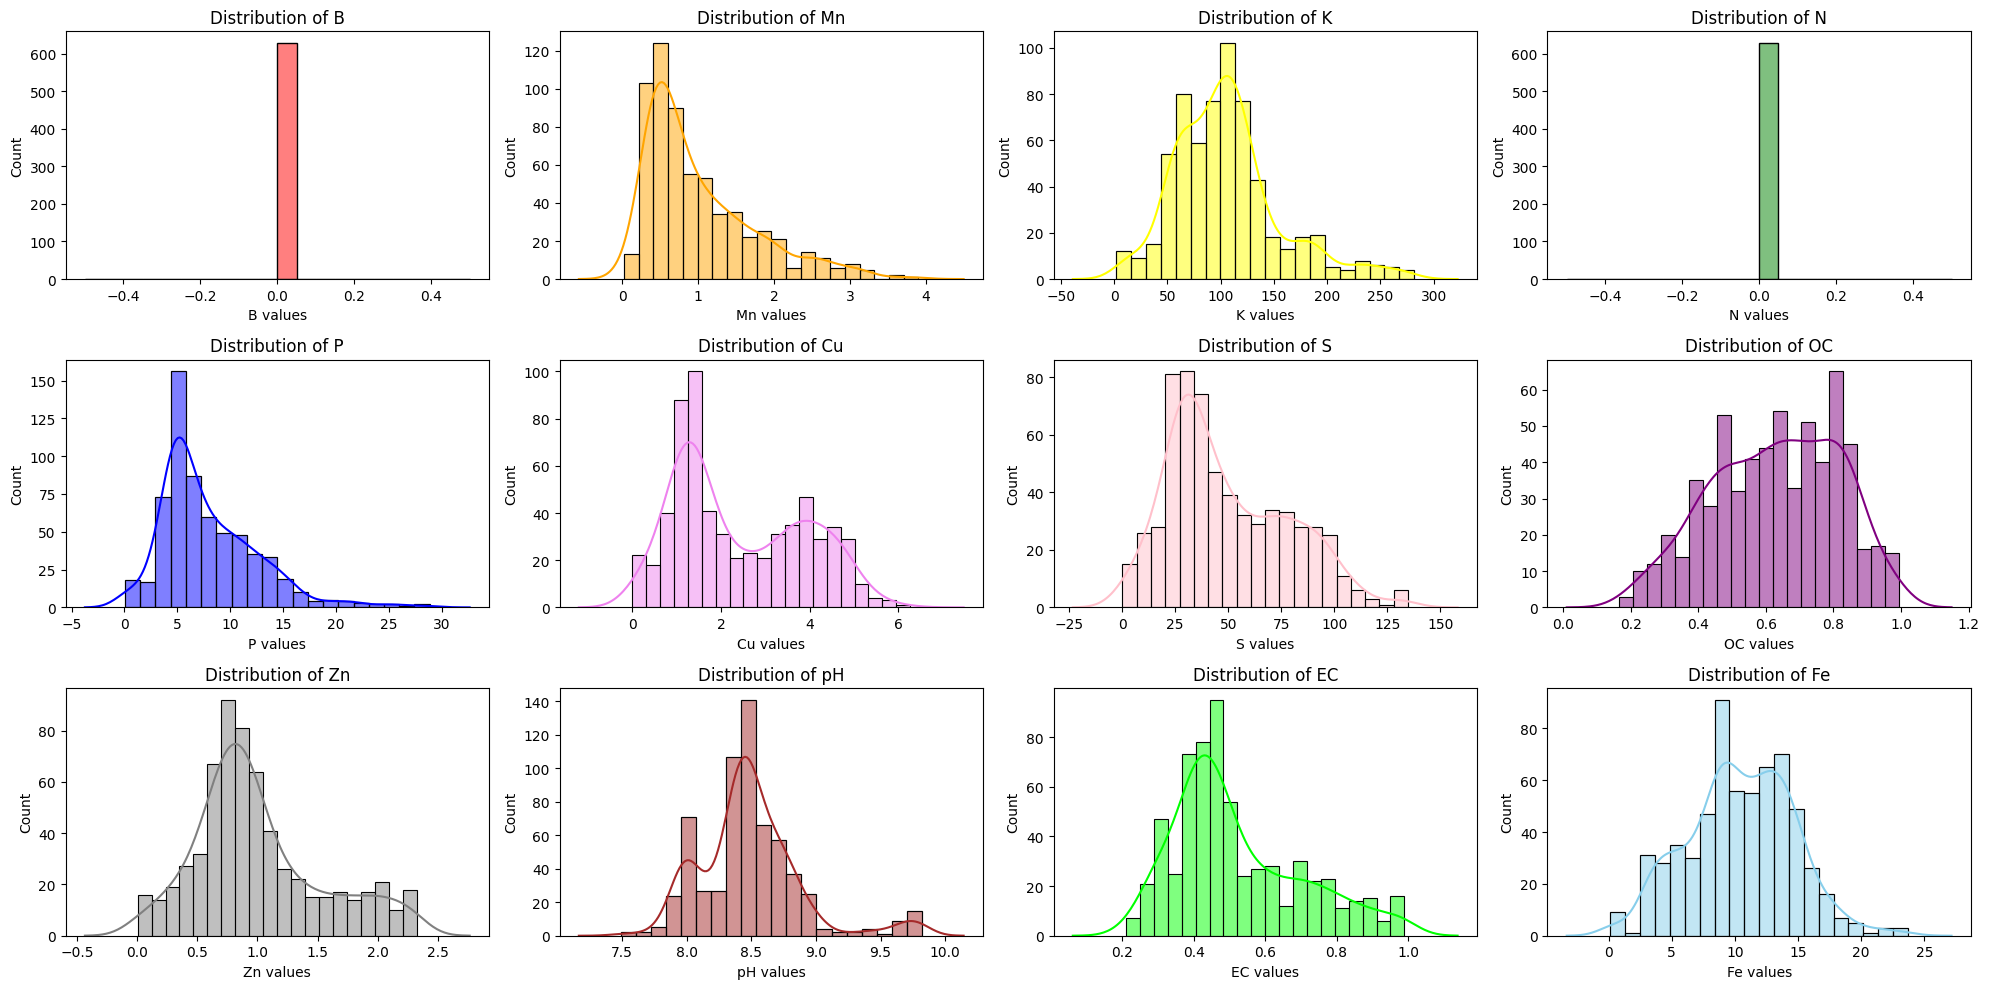

District : SRI MUKTSAR SAHIB
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0002, Max = 1.14
K min and max values :  Min = 0.0, Max = 284.0
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 0.0, Max = 24.5195
Cu min and max values :  Min = 0.0, Max = 2.441
S min and max values :  Min = 0.013, Max = 206.0
OC min and max values :  Min = 0.0, Max = 0.76
Zn min and max values :  Min = 0.0, Max = 3.4
pH min and max values :  Min = 7.1, Max = 9.0
EC min and max values :  Min = 0.033, Max = 1.02
Fe min and max values :  Min = 0.0026, Max = 25.59


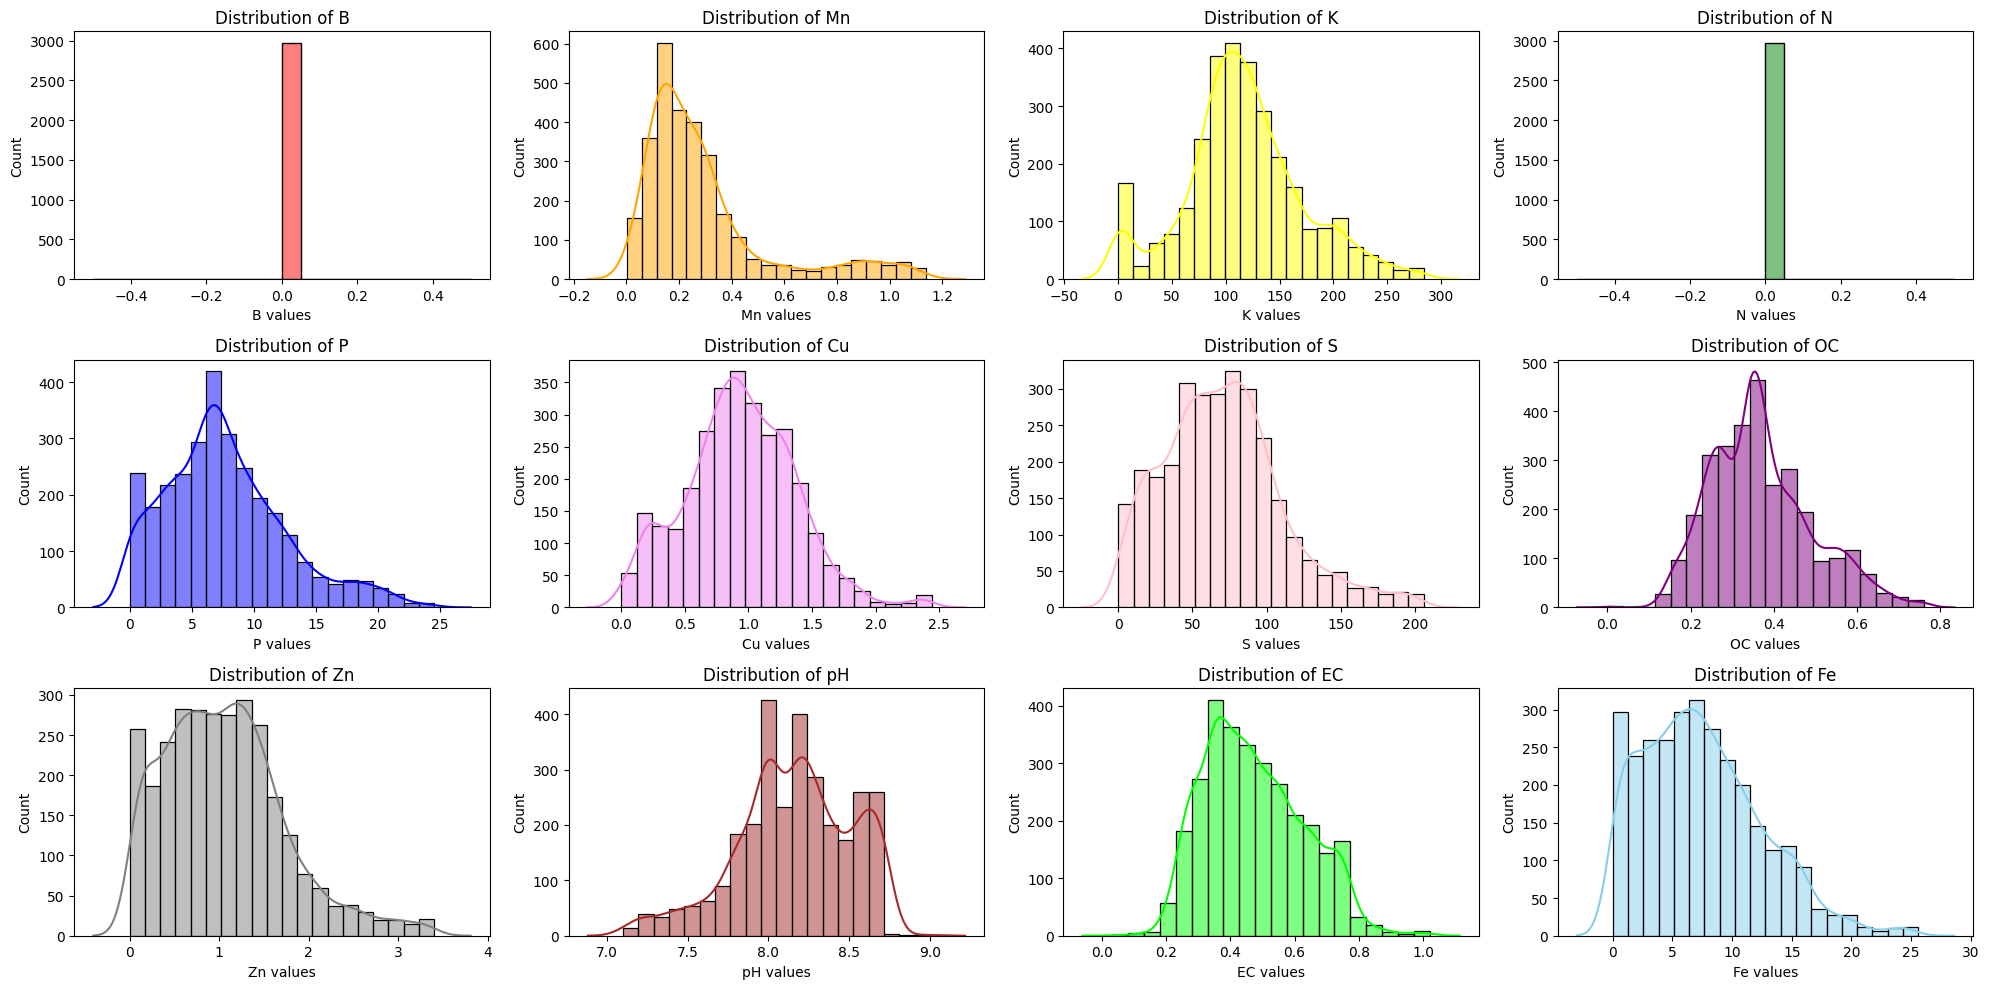

District : KAPURTHALA
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0, Max = 0.0
K min and max values :  Min = 0.0, Max = 0.0
N min and max values :  Min = 0.0, Max = 1.0
P min and max values :  Min = 0.0, Max = 0.0
Cu min and max values :  Min = 0.0, Max = 0.0
S min and max values :  Min = 0.0, Max = 0.0
OC min and max values :  Min = 0.39, Max = 0.47
Zn min and max values :  Min = 0.0, Max = 0.0
pH min and max values :  Min = 7.1, Max = 7.96
EC min and max values :  Min = 0.2, Max = 0.45
Fe min and max values :  Min = 0.0, Max = 0.0


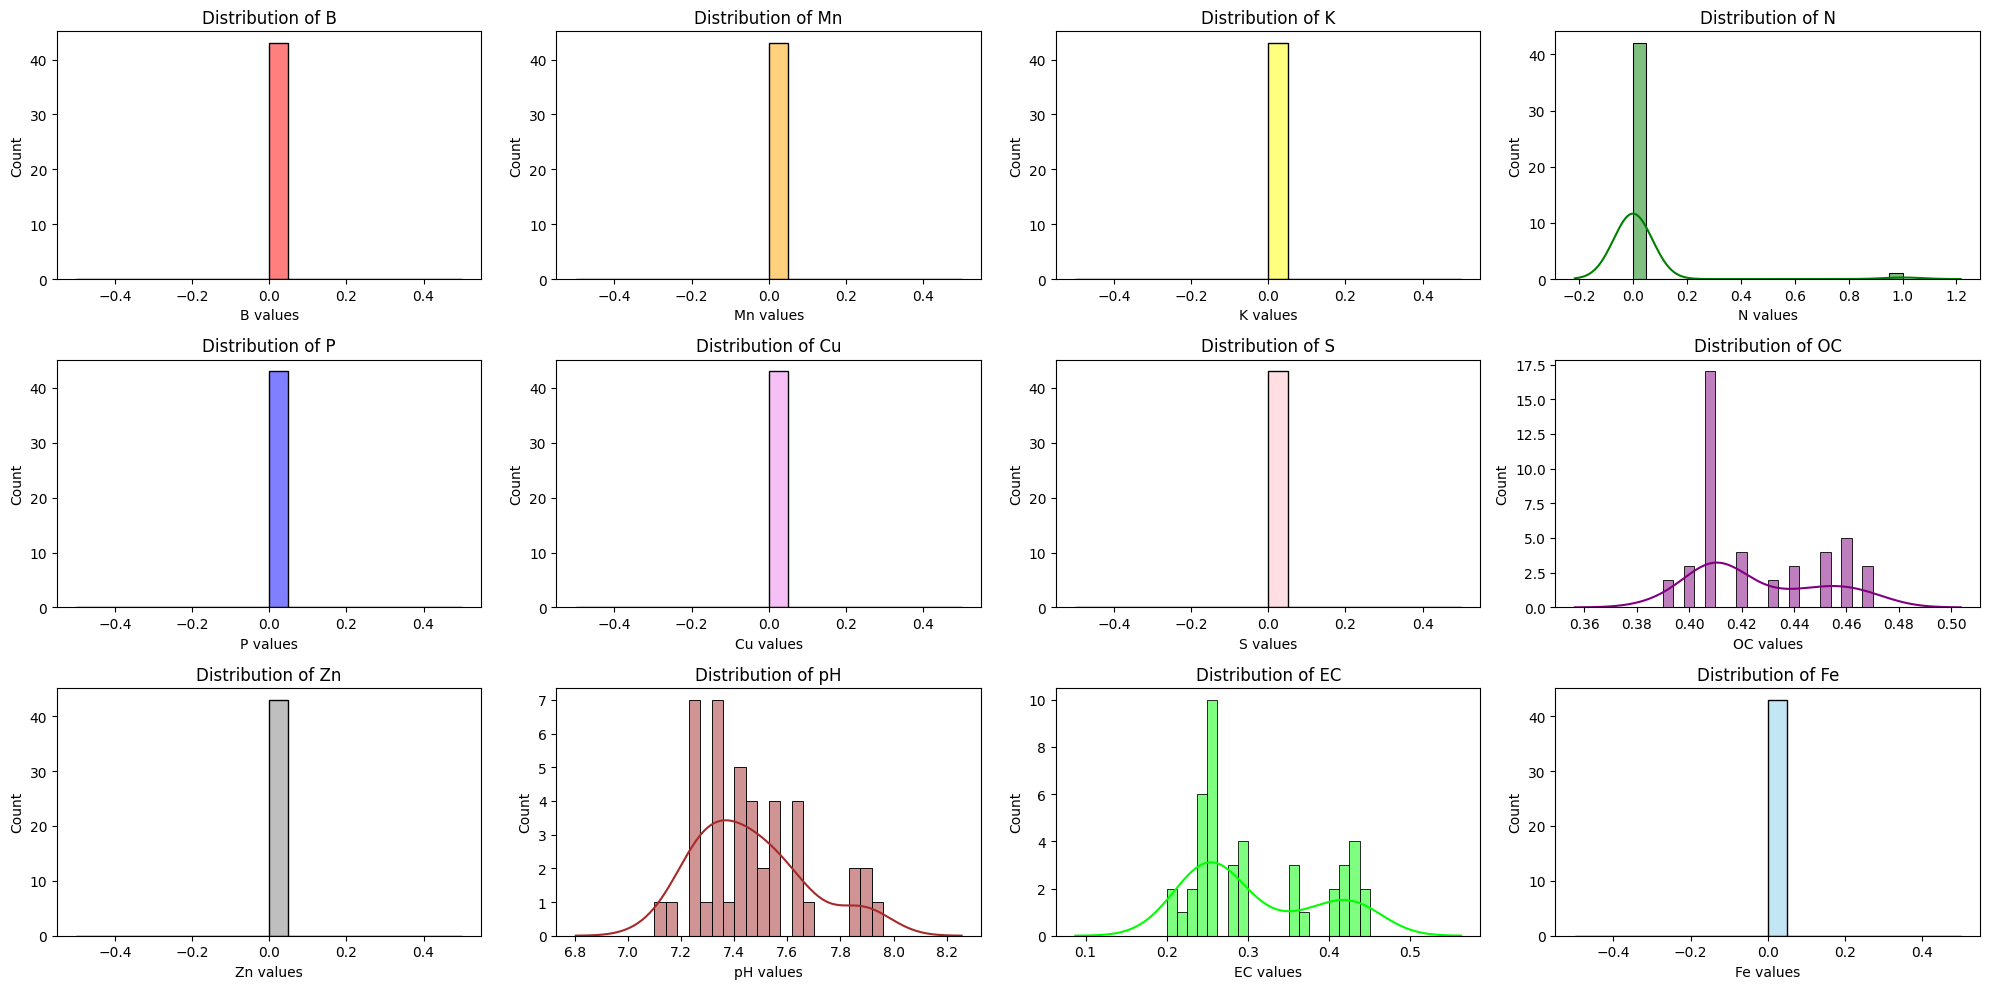

District : BATHINDA
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0008, Max = 5.196
K min and max values :  Min = 0.5467, Max = 147.318
N min and max values :  Min = 0.0, Max = 383.04
P min and max values :  Min = 0.205, Max = 36.28
Cu min and max values :  Min = 0.0008, Max = 1.222
S min and max values :  Min = 0.9538, Max = 38.73
OC min and max values :  Min = 0.06, Max = 0.975
Zn min and max values :  Min = 0.2851, Max = 1.632
pH min and max values :  Min = 5.7, Max = 9.9
EC min and max values :  Min = 0.1, Max = 1.168
Fe min and max values :  Min = 0.0134, Max = 26.34


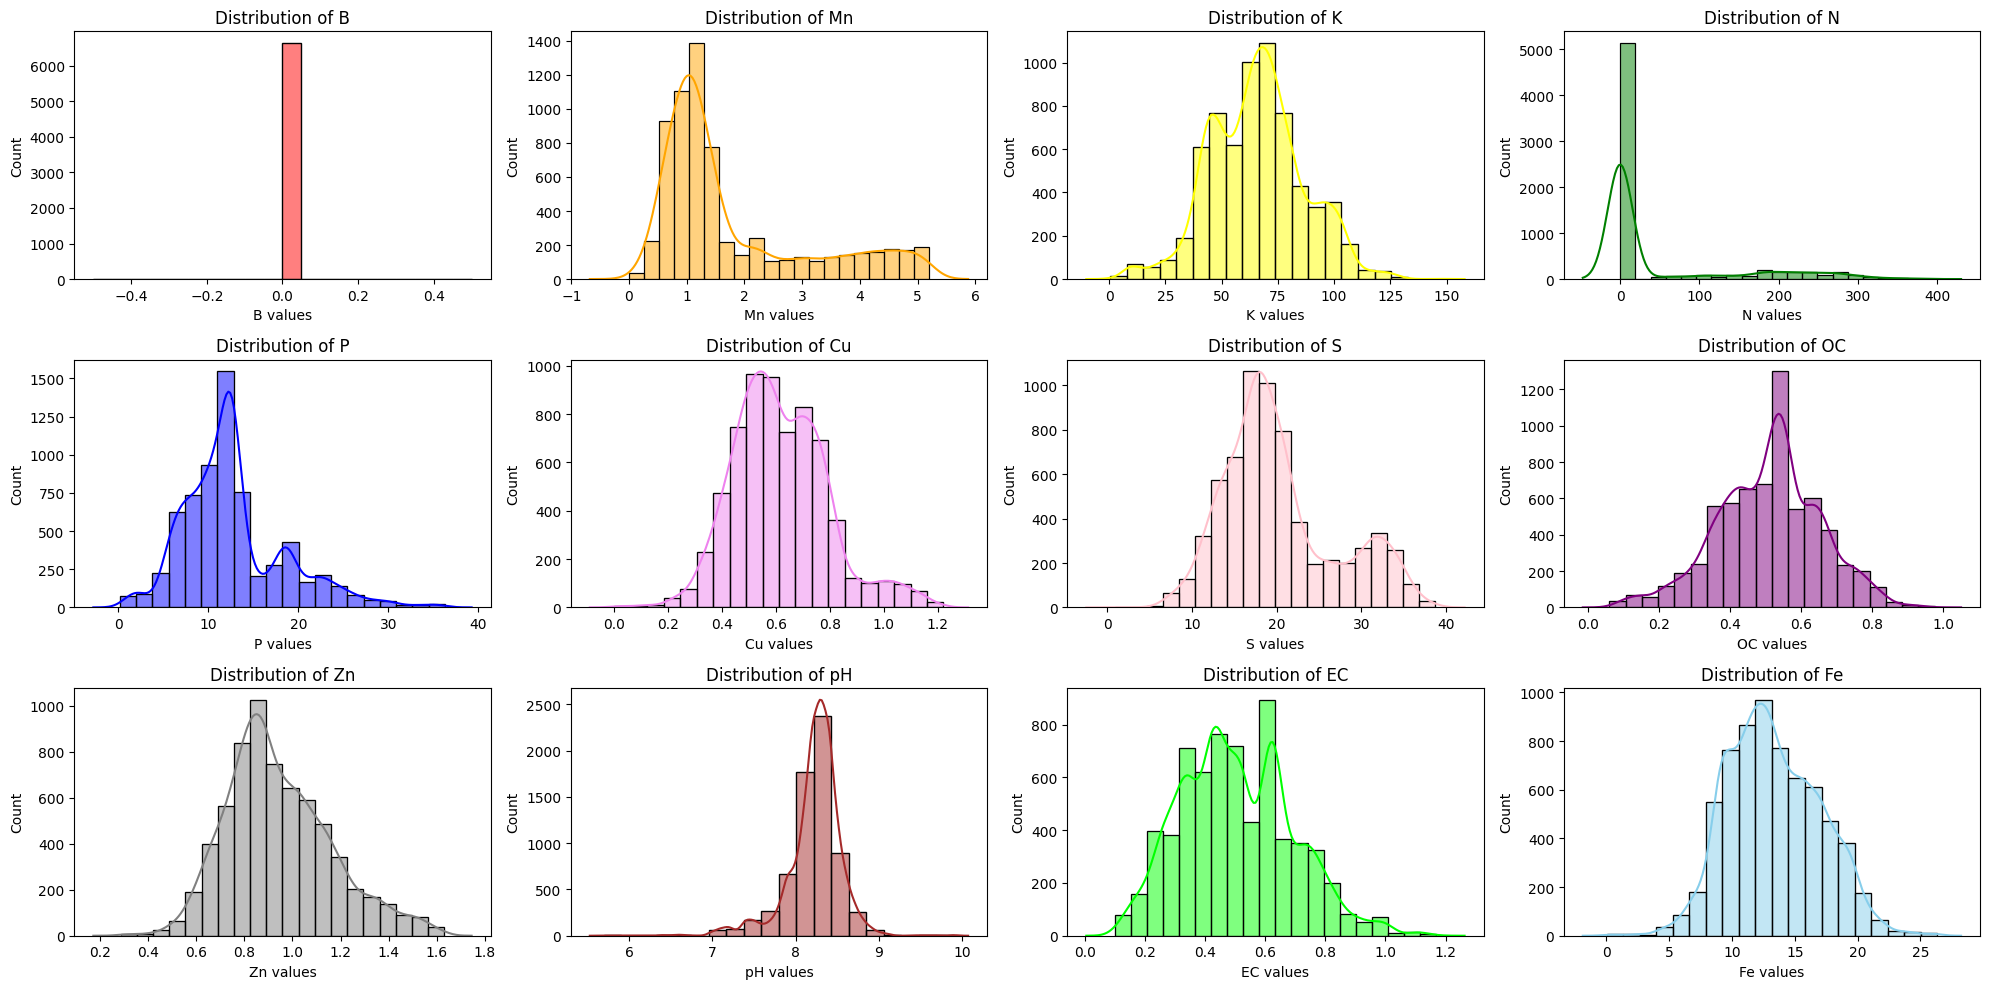

District : GURDASPUR
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0, Max = 0.0
K min and max values :  Min = 0.0, Max = 0.0
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 0.0, Max = 0.0
Cu min and max values :  Min = 0.0, Max = 0.0
S min and max values :  Min = 0.0, Max = 0.0
OC min and max values :  Min = 0.38, Max = 1.0
Zn min and max values :  Min = 0.0, Max = 0.0
pH min and max values :  Min = 6.69, Max = 8.4
EC min and max values :  Min = 0.18, Max = 0.57
Fe min and max values :  Min = 0.0, Max = 0.0


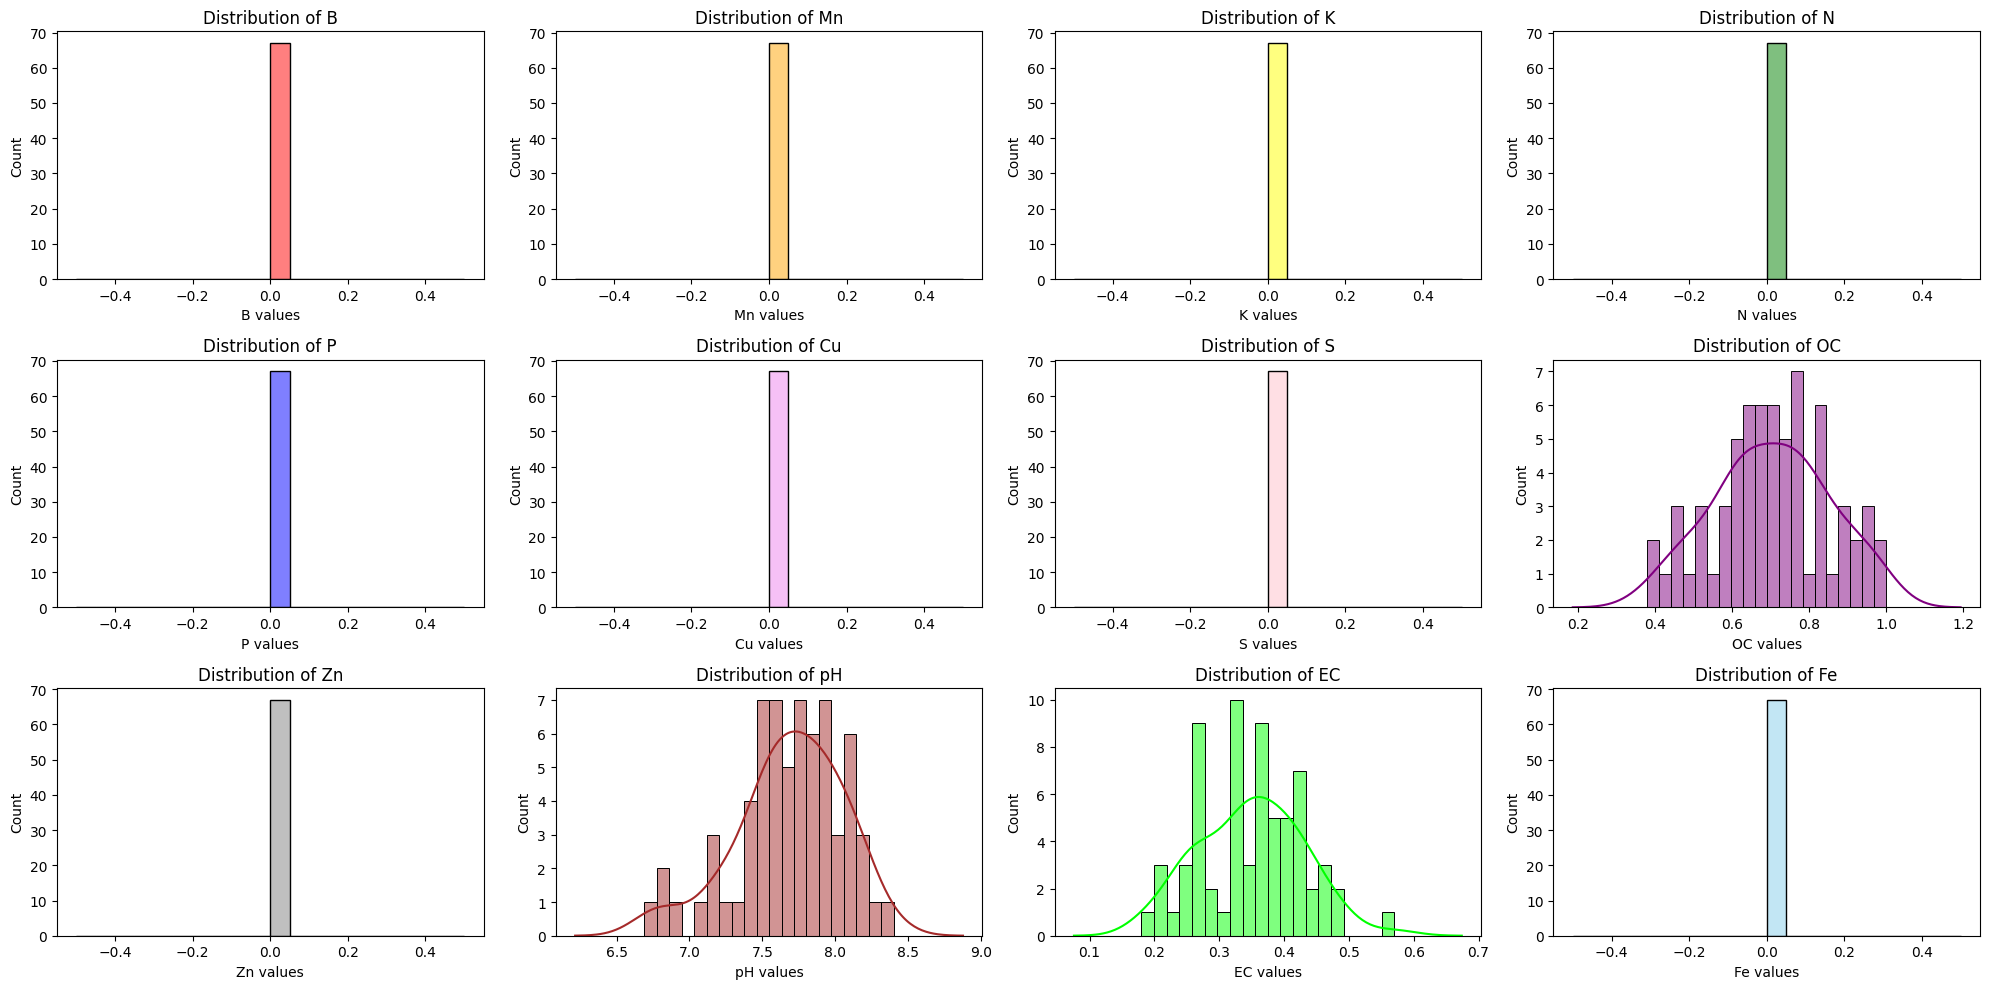

District : MOGA
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 2.15, Max = 2.15
K min and max values :  Min = 90.0, Max = 90.0
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 7.0, Max = 7.0
Cu min and max values :  Min = 8.0, Max = 8.0
S min and max values :  Min = 56.0, Max = 56.0
OC min and max values :  Min = 0.41, Max = 0.41
Zn min and max values :  Min = 1.15, Max = 1.15
pH min and max values :  Min = 7.8, Max = 7.8
EC min and max values :  Min = 0.45, Max = 0.45
Fe min and max values :  Min = 5.0, Max = 5.0


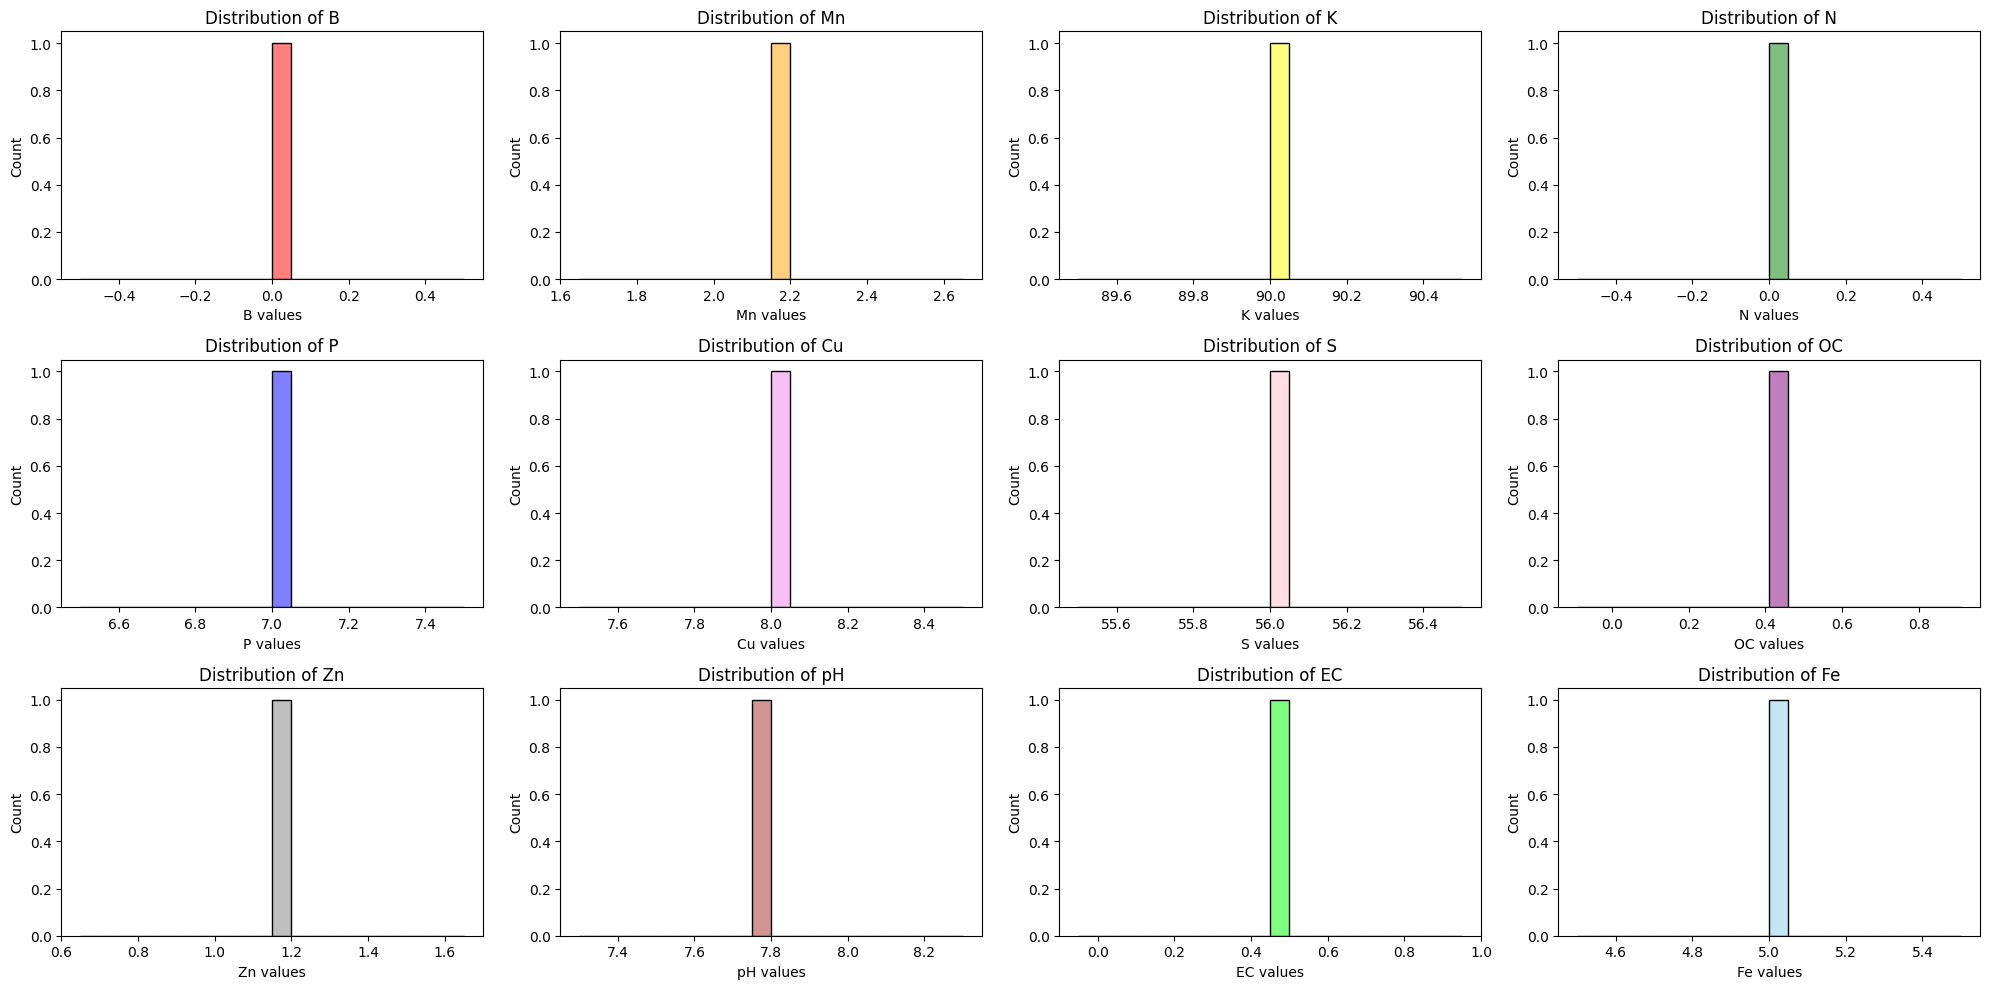

District : AMRITSAR
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0, Max = 0.0
K min and max values :  Min = 0.0, Max = 0.0
N min and max values :  Min = -3.0, Max = 10.0
P min and max values :  Min = 0.0, Max = 0.0
Cu min and max values :  Min = 0.0, Max = 0.0
S min and max values :  Min = 0.0, Max = 0.0
OC min and max values :  Min = 0.14, Max = 0.84
Zn min and max values :  Min = 0.0, Max = 0.0
pH min and max values :  Min = 6.0, Max = 9.1
EC min and max values :  Min = 0.0, Max = 0.75
Fe min and max values :  Min = 0.0, Max = 0.0


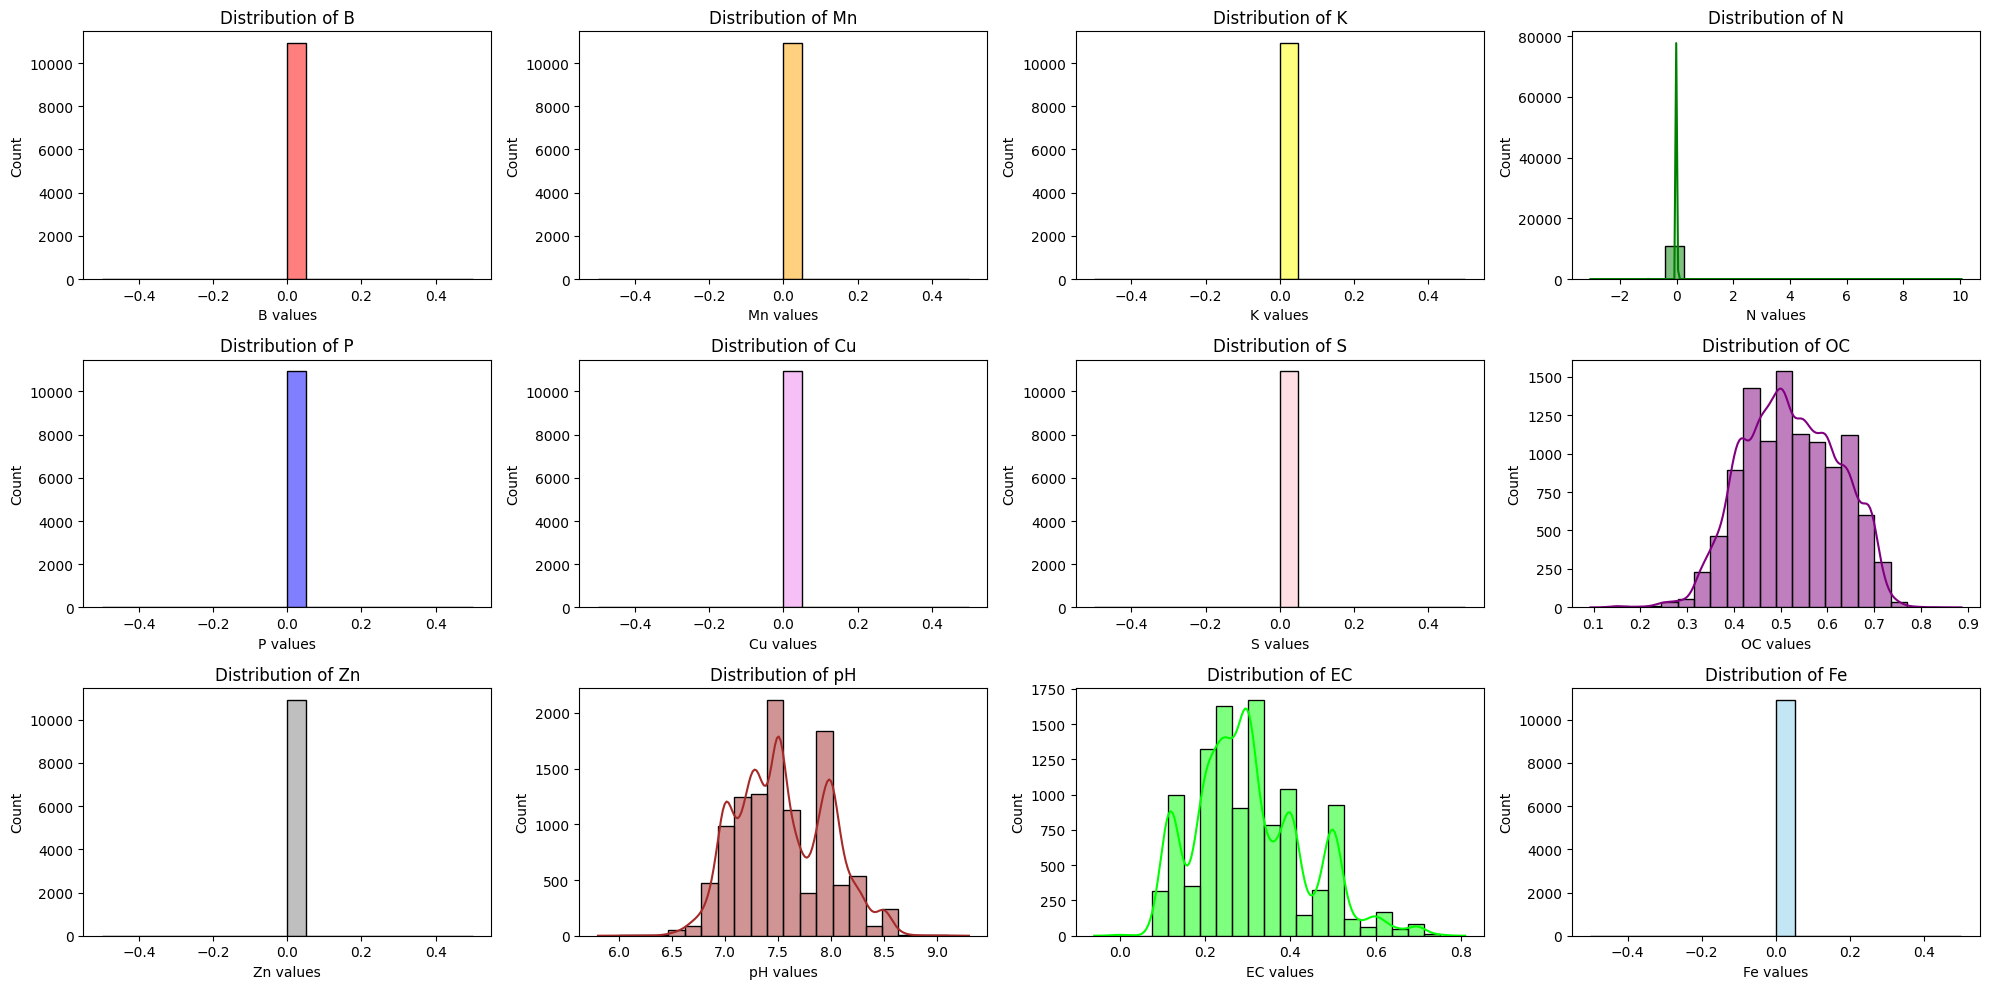

District : SHAHID BHAGAT SINGH NAGAR
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.4563, Max = 5.526
K min and max values :  Min = 13.58, Max = 118.1
N min and max values :  Min = 0.405, Max = 222.75
P min and max values :  Min = 1.291, Max = 11.5
Cu min and max values :  Min = 0.1167, Max = 0.8745
S min and max values :  Min = 3.151, Max = 44.48
OC min and max values :  Min = 0.12, Max = 0.99
Zn min and max values :  Min = 0.2214, Max = 1.688
pH min and max values :  Min = 7.0, Max = 8.1
EC min and max values :  Min = 0.11, Max = 0.41
Fe min and max values :  Min = 3.57, Max = 26.31


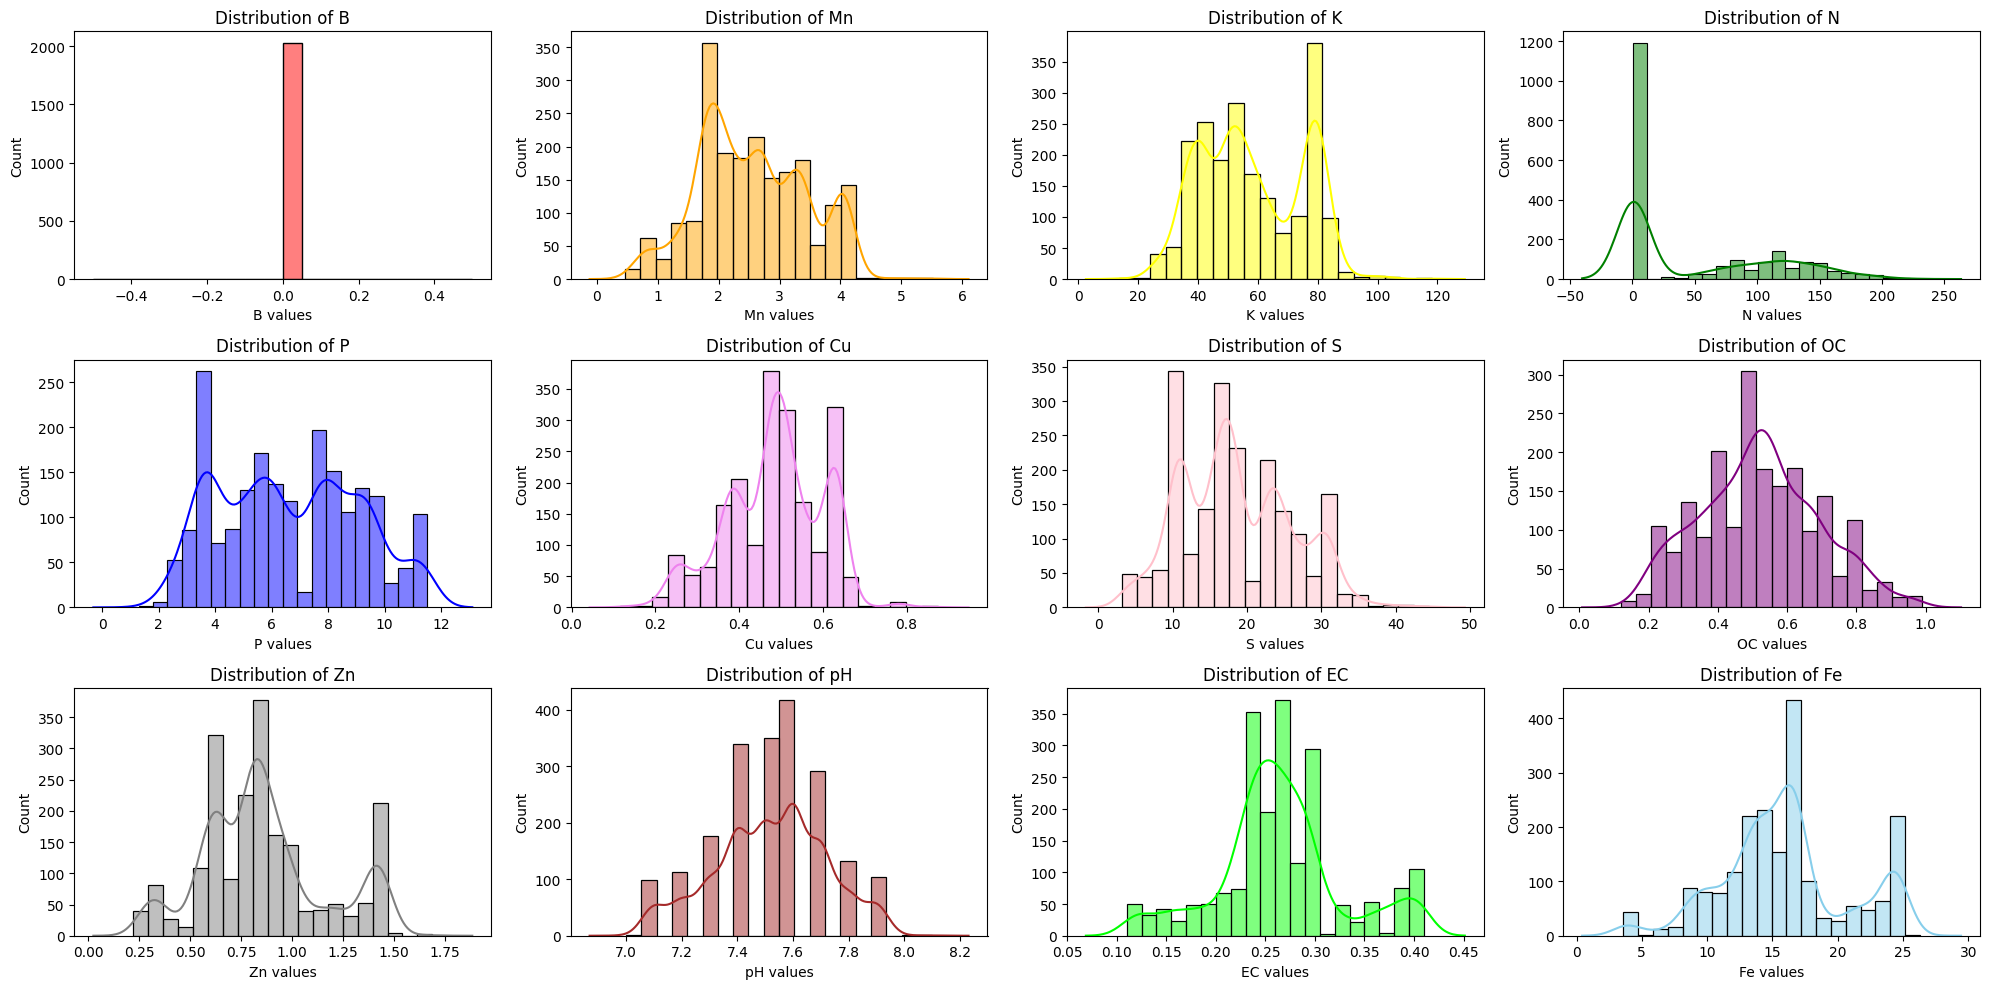

District : LUDHIANA
B min and max values :  Min = nan, Max = nan
Mn min and max values :  Min = nan, Max = nan
K min and max values :  Min = nan, Max = nan
N min and max values :  Min = nan, Max = nan
P min and max values :  Min = nan, Max = nan
Cu min and max values :  Min = nan, Max = nan
S min and max values :  Min = nan, Max = nan
OC min and max values :  Min = nan, Max = nan
Zn min and max values :  Min = nan, Max = nan
pH min and max values :  Min = nan, Max = nan
EC min and max values :  Min = nan, Max = nan
Fe min and max values :  Min = nan, Max = nan


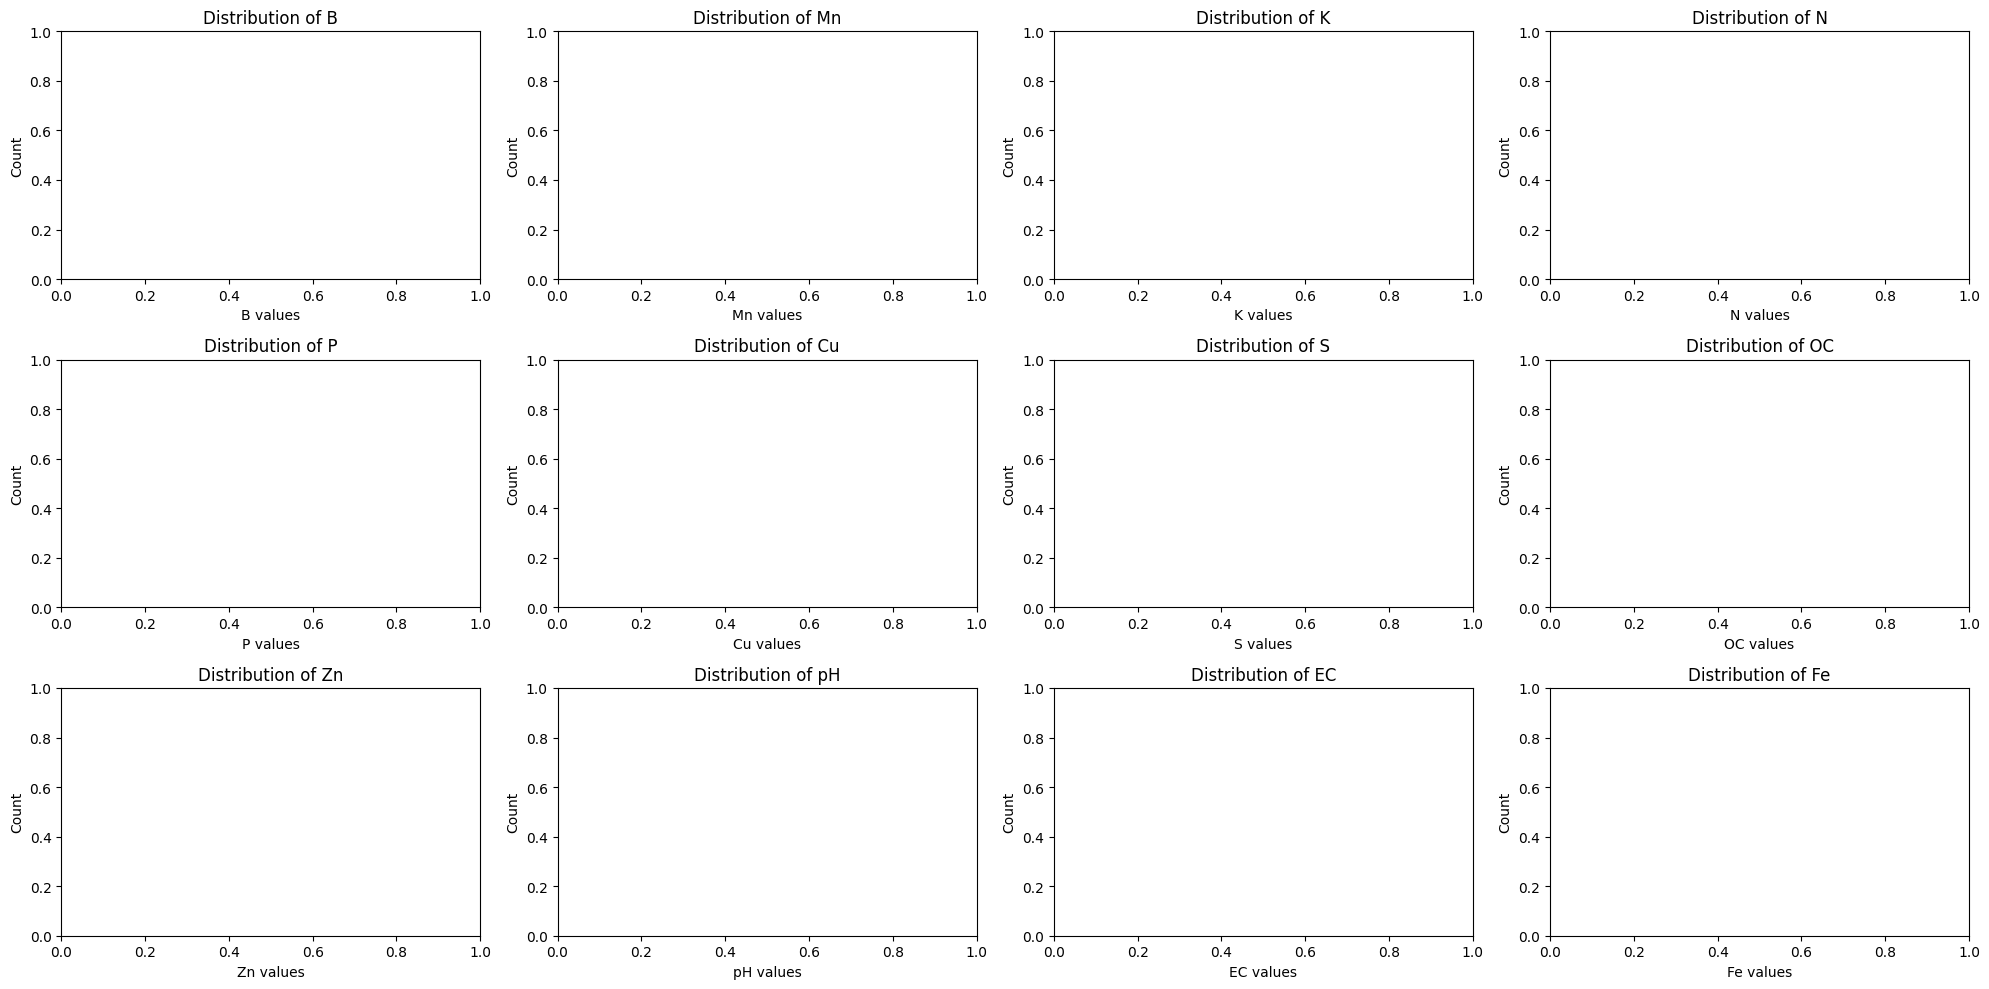

District : FATEHGARH SAHIB
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.1047, Max = 4.558
K min and max values :  Min = 17.34, Max = 202.7
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 3.57, Max = 33.15
Cu min and max values :  Min = 0.15501, Max = 3.657
S min and max values :  Min = 2.803, Max = 104.5
OC min and max values :  Min = 0.27, Max = 0.6
Zn min and max values :  Min = 0.7291, Max = 5.927
pH min and max values :  Min = 7.0, Max = 8.9
EC min and max values :  Min = 0.18, Max = 0.36
Fe min and max values :  Min = 0.1777, Max = 25.98


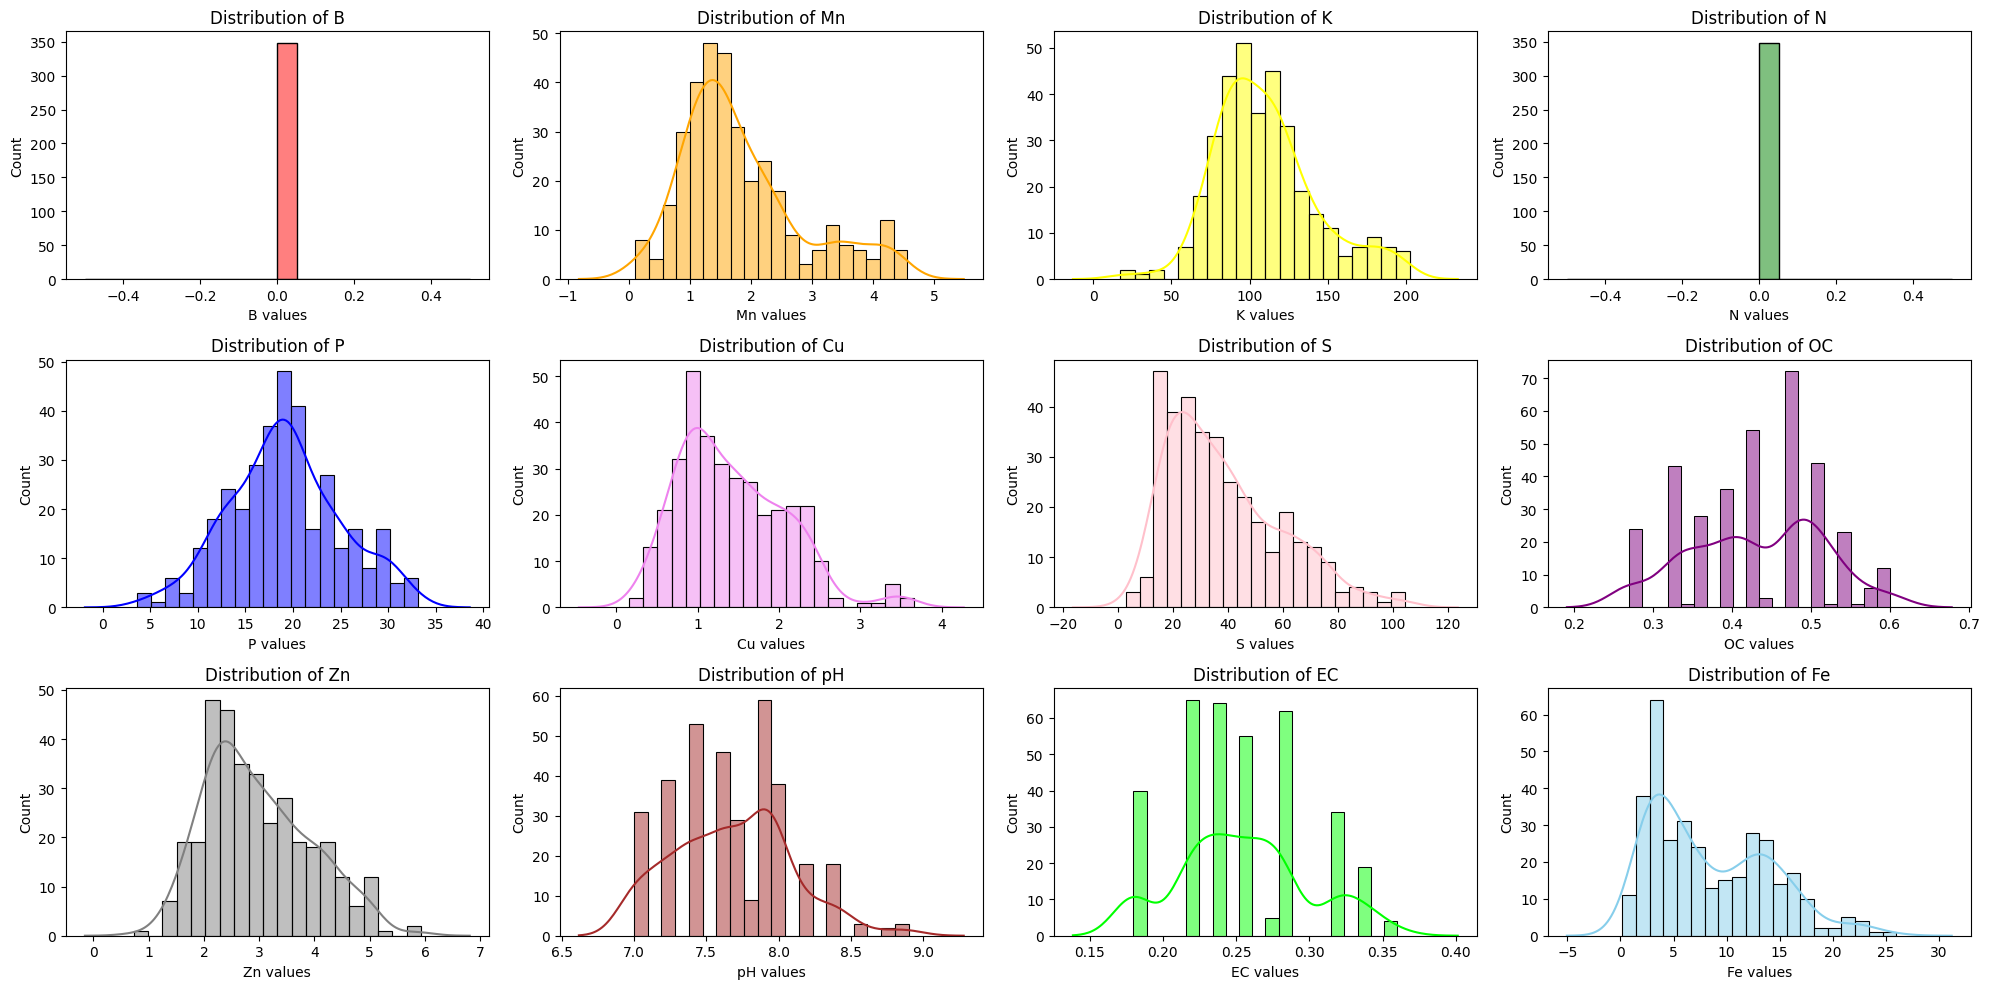

District : PATIALA
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0, Max = 1.0
K min and max values :  Min = 0.0, Max = 0.0
N min and max values :  Min = -2.0, Max = 0.0
P min and max values :  Min = 0.0, Max = 0.0
Cu min and max values :  Min = 0.0, Max = 0.0
S min and max values :  Min = 0.0, Max = 0.0
OC min and max values :  Min = 0.0, Max = 0.95
Zn min and max values :  Min = 0.0, Max = 0.0
pH min and max values :  Min = 4.41, Max = 9.6
EC min and max values :  Min = 0.0, Max = 1.0
Fe min and max values :  Min = 0.0, Max = 0.0


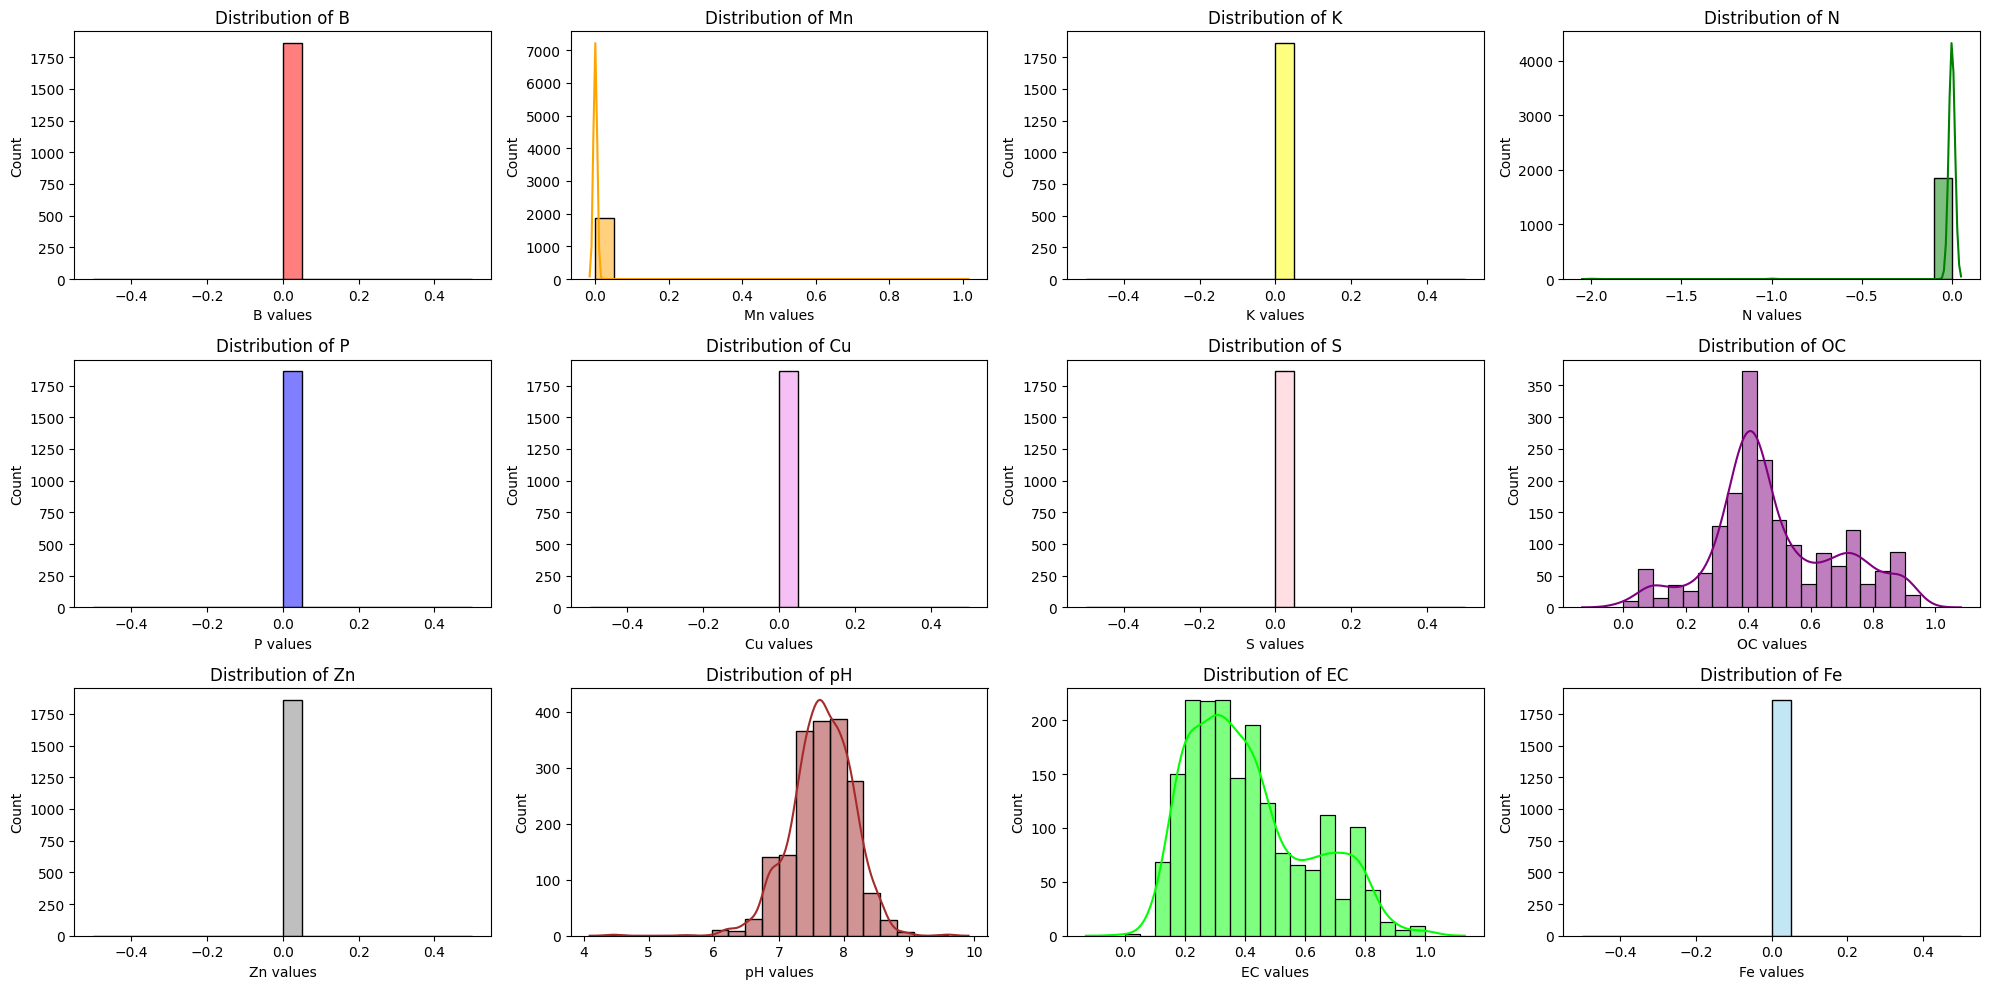

District : RUPNAGAR
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.5922, Max = 17.62
K min and max values :  Min = 0.0, Max = 128.7552
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 0.0, Max = 46.04544
Cu min and max values :  Min = 0.3607, Max = 2.791
S min and max values :  Min = 2.305, Max = 18.77
OC min and max values :  Min = 0.36, Max = 0.6
Zn min and max values :  Min = 0.2084, Max = 3.362
pH min and max values :  Min = 6.0, Max = 8.01
EC min and max values :  Min = 0.2, Max = 0.36
Fe min and max values :  Min = 0.0, Max = 15.51


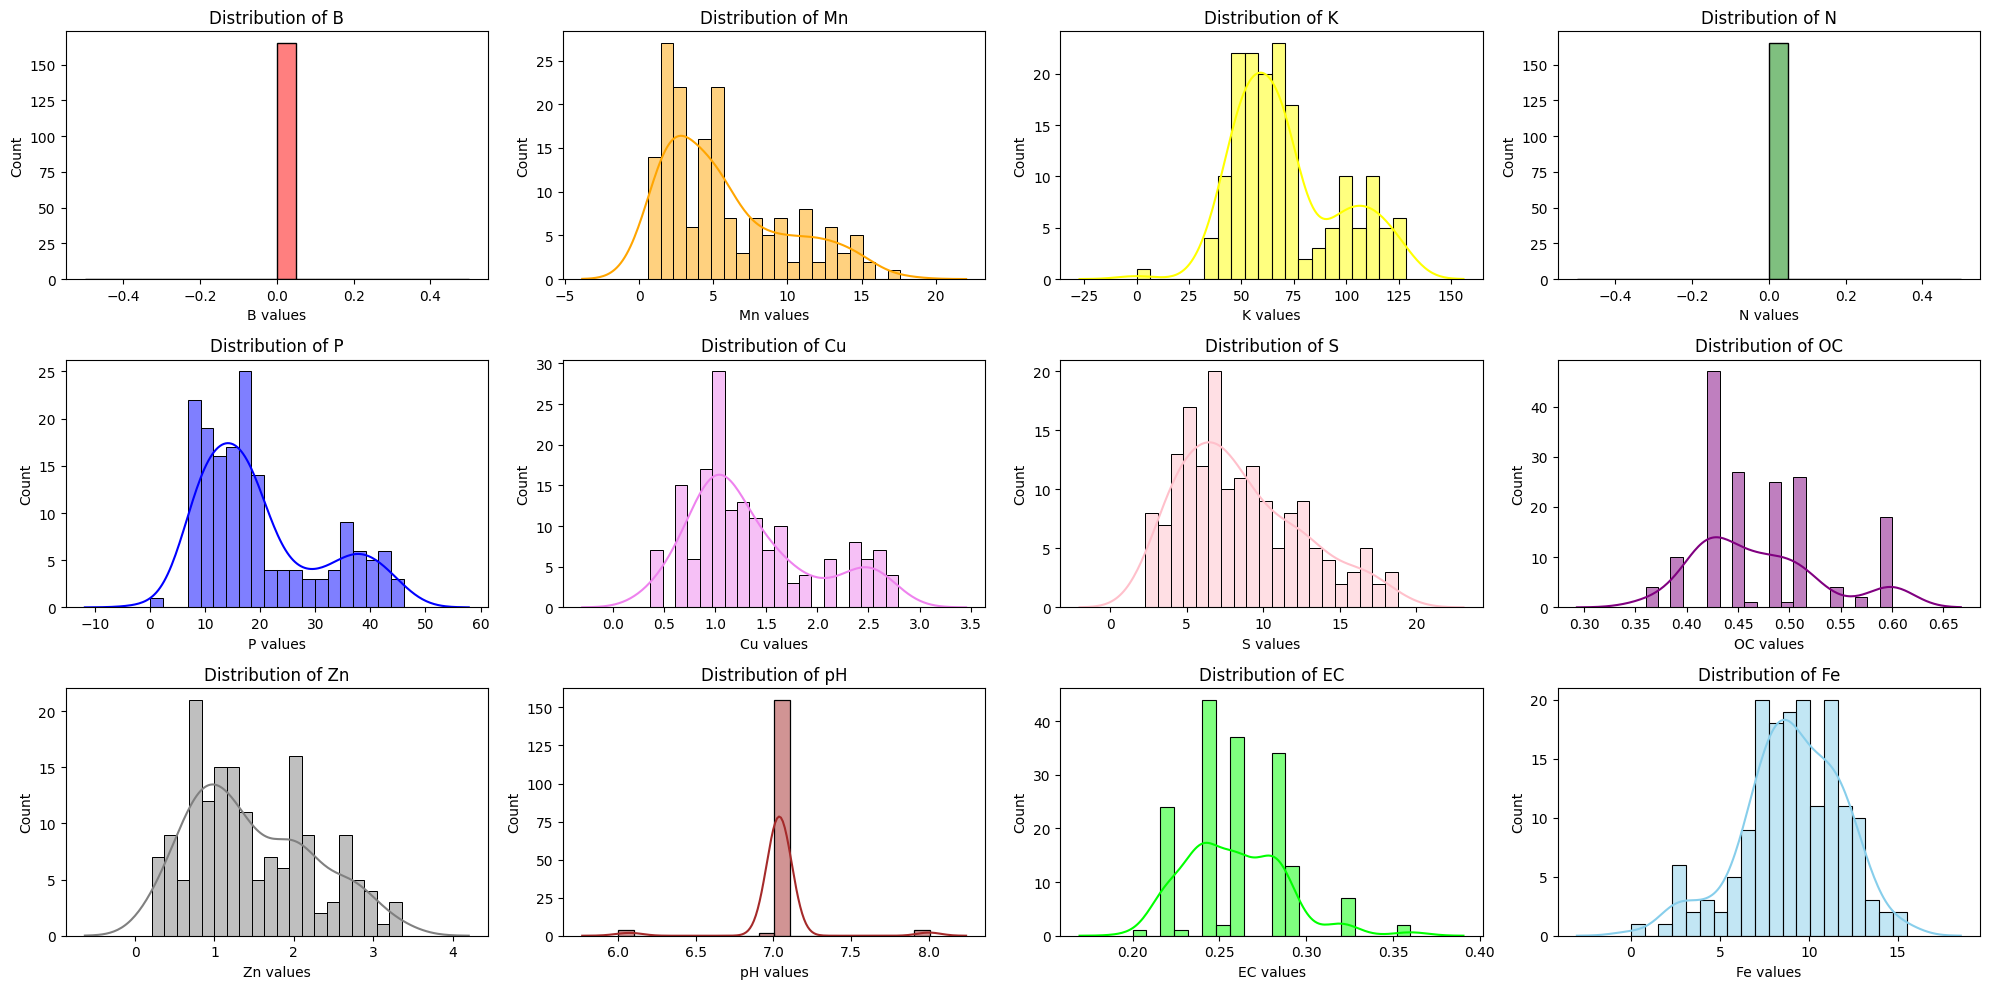

District : S.A.S NAGAR
B min and max values :  Min = nan, Max = nan
Mn min and max values :  Min = nan, Max = nan
K min and max values :  Min = nan, Max = nan
N min and max values :  Min = nan, Max = nan
P min and max values :  Min = nan, Max = nan
Cu min and max values :  Min = nan, Max = nan
S min and max values :  Min = nan, Max = nan
OC min and max values :  Min = nan, Max = nan
Zn min and max values :  Min = nan, Max = nan
pH min and max values :  Min = nan, Max = nan
EC min and max values :  Min = nan, Max = nan
Fe min and max values :  Min = nan, Max = nan


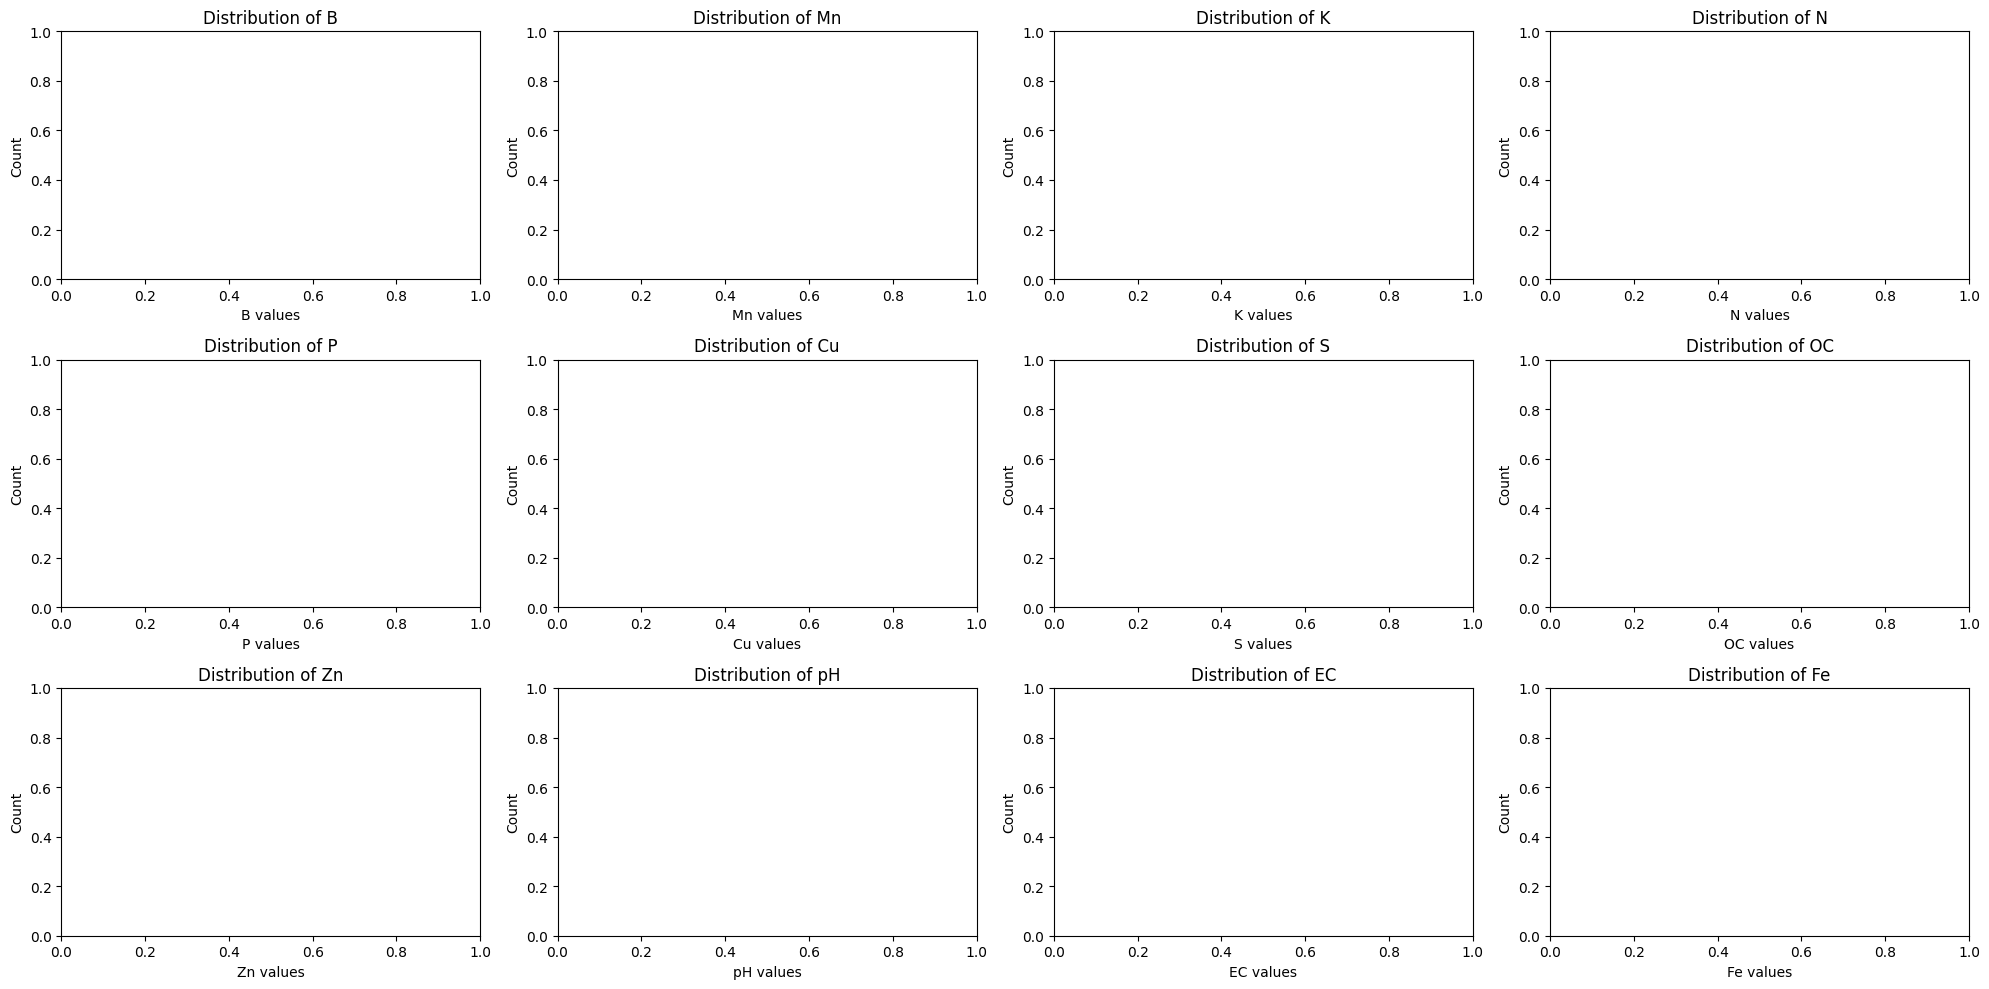

District : TARN TARAN
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.0, Max = 0.0
K min and max values :  Min = 0.0, Max = 0.0
N min and max values :  Min = 0.0, Max = 0.0
P min and max values :  Min = 0.0, Max = 0.0
Cu min and max values :  Min = 0.0, Max = 0.0
S min and max values :  Min = 0.0, Max = 0.0
OC min and max values :  Min = 0.7, Max = 0.85
Zn min and max values :  Min = 0.0, Max = 0.0
pH min and max values :  Min = 7.6, Max = 7.9
EC min and max values :  Min = 0.2, Max = 0.2
Fe min and max values :  Min = 0.0, Max = 0.0


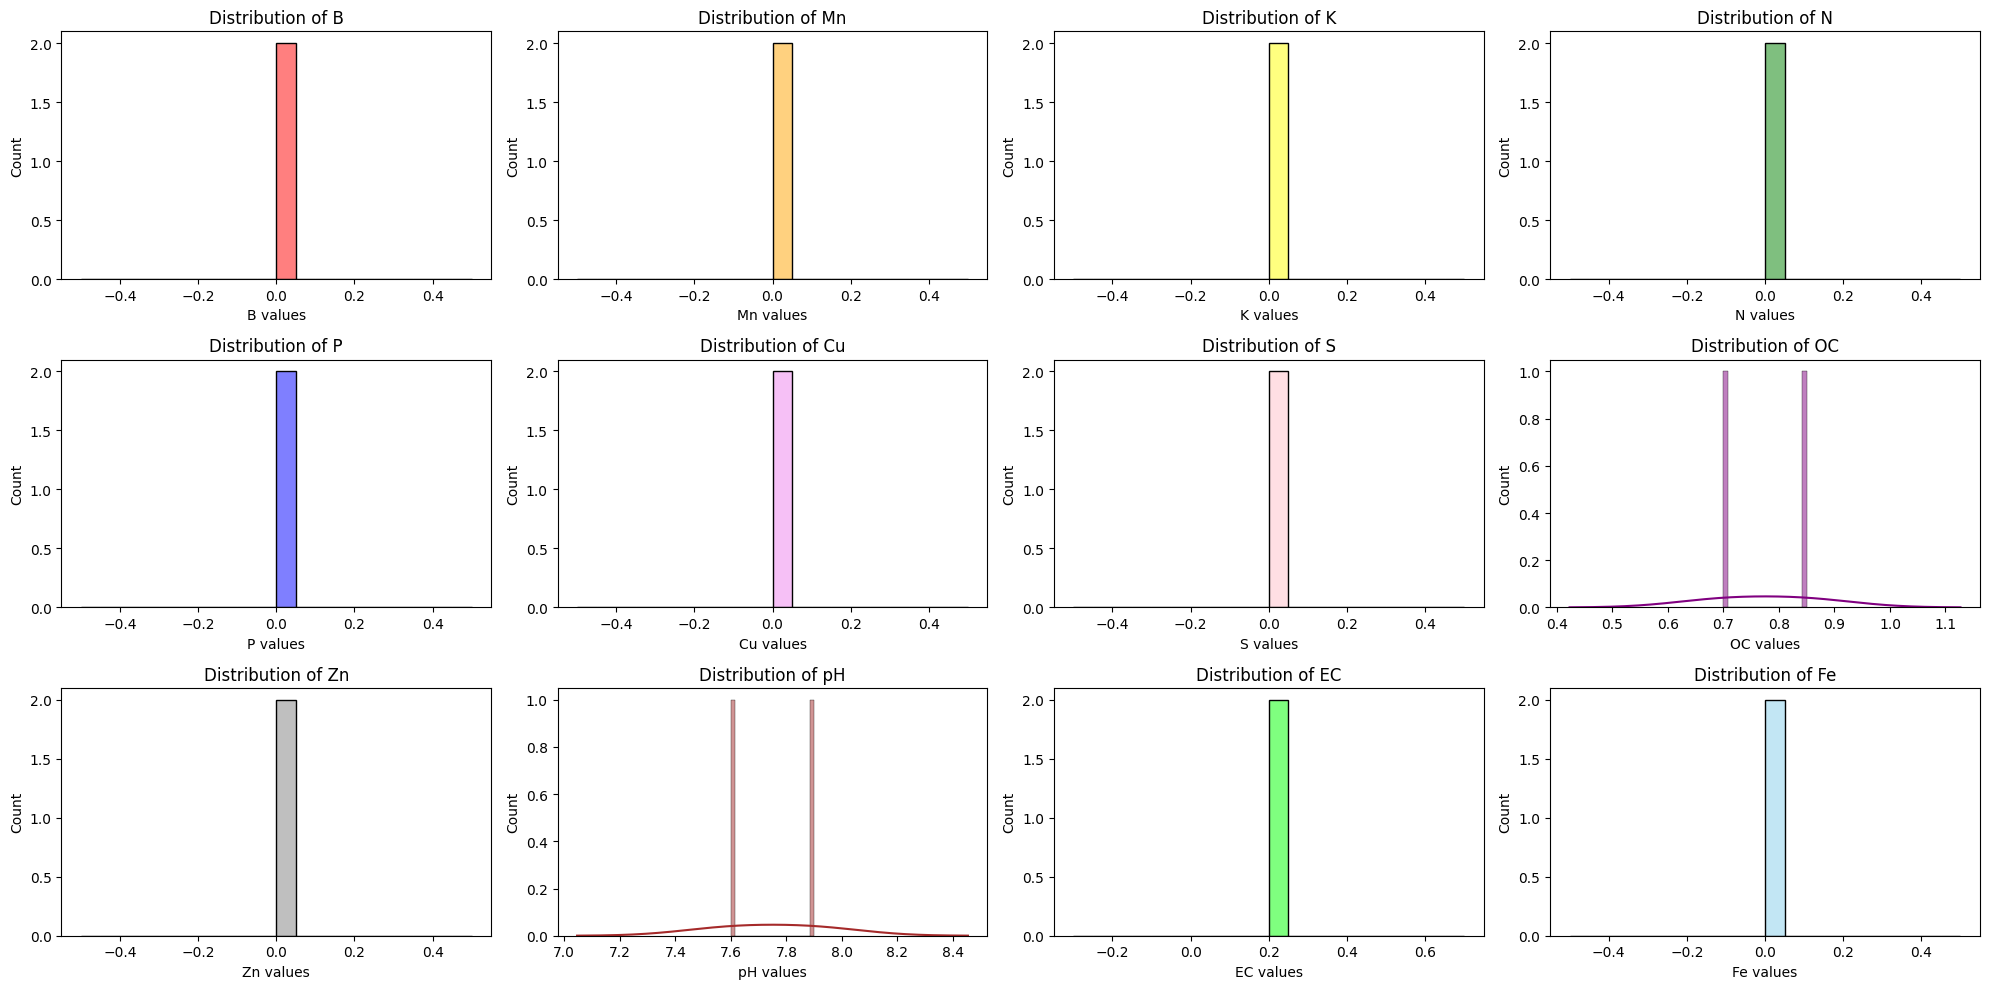

District : SANGRUR
B min and max values :  Min = 0.0, Max = 0.0
Mn min and max values :  Min = 0.012, Max = 12.44
K min and max values :  Min = 0.24, Max = 439.936
N min and max values :  Min = 0.0, Max = 16.12
P min and max values :  Min = 0.0, Max = 74.41
Cu min and max values :  Min = 0.008, Max = 2.905
S min and max values :  Min = 0.49, Max = 131.595
OC min and max values :  Min = 0.35, Max = 0.8
Zn min and max values :  Min = 0.0, Max = 3.175
pH min and max values :  Min = 1.782, Max = 9.0
EC min and max values :  Min = 0.15, Max = 0.95
Fe min and max values :  Min = 0.097, Max = 26.93


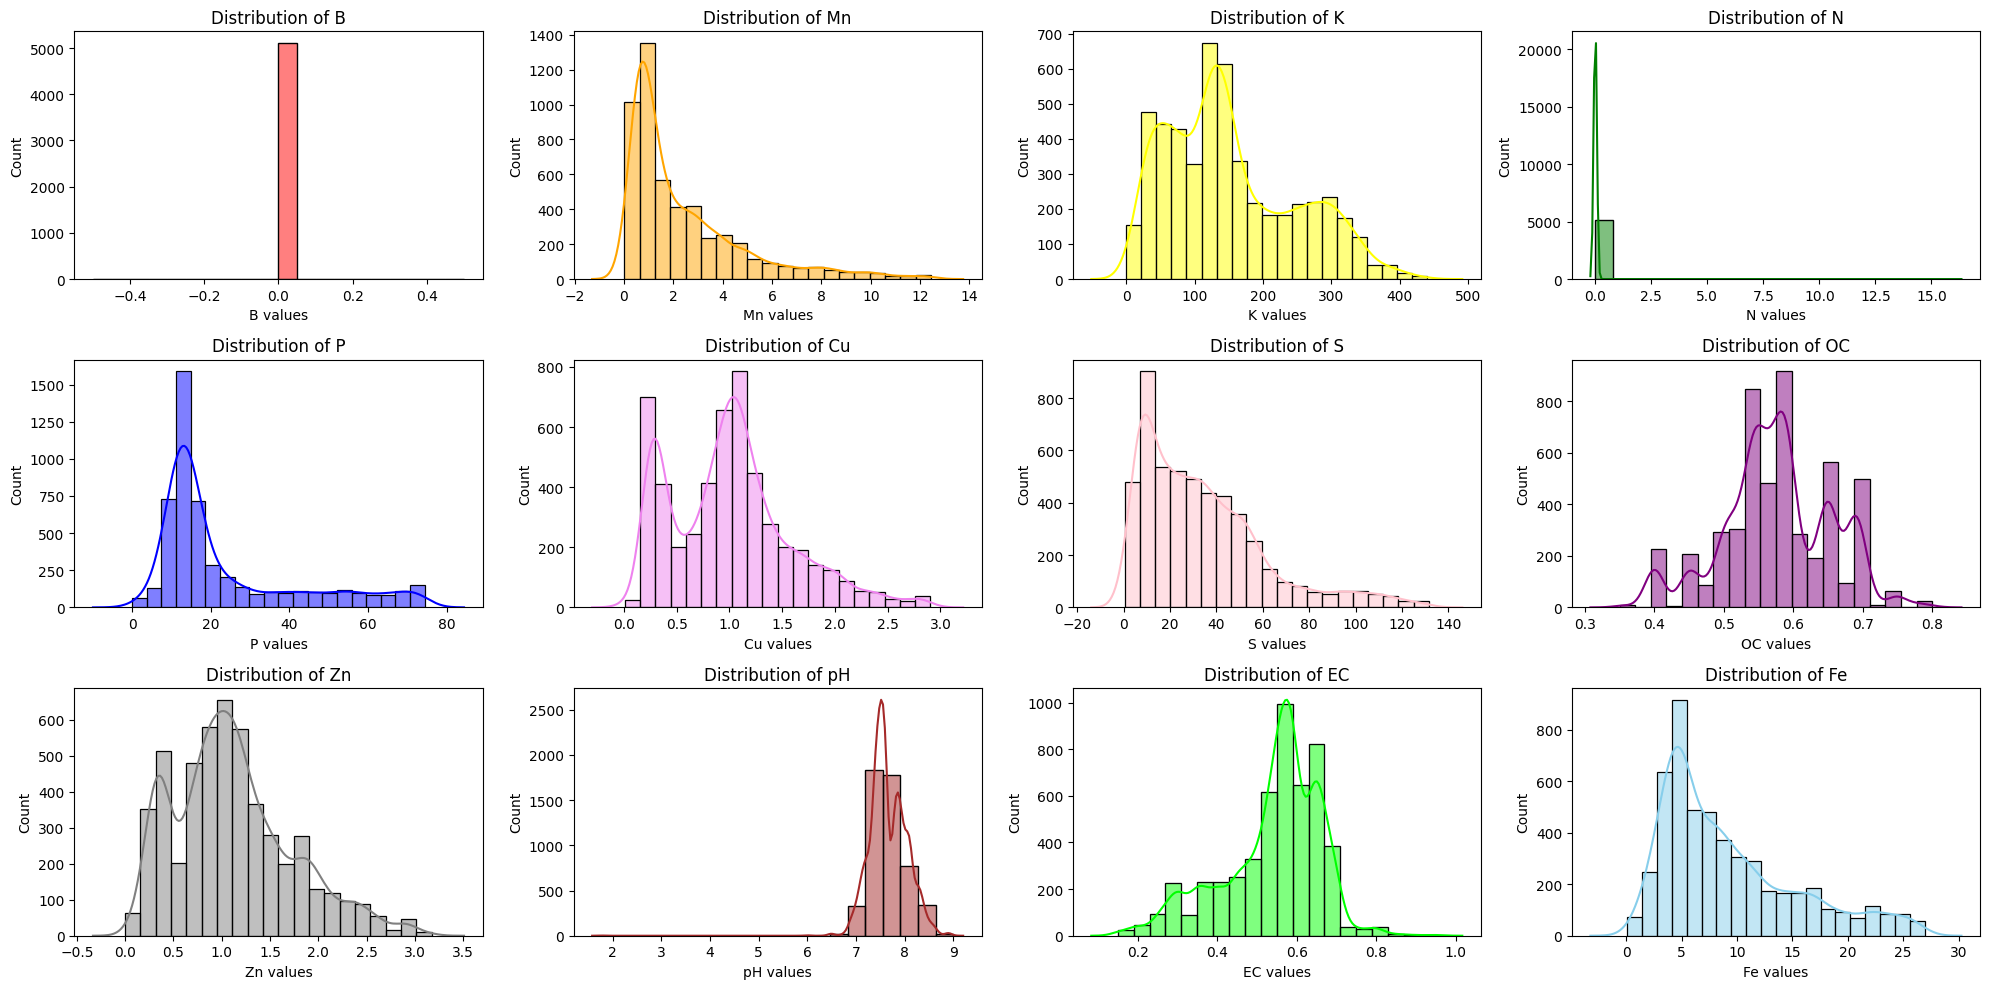

Total districts : 16
No. of samples reduced from 56939 to 36460


In [11]:
from tqdm.auto import tqdm

FOLDER_PATH = "./data/2023-24"
INPUT_CSV = "PUNJAB_2023_24.csv"
OUTPUT_FOLDER = "./data/filtered_2023-24"

file_path = os.path.join(FOLDER_PATH, INPUT_CSV)
df = pd.read_csv(file_path)
unique_districts = df["district"].unique()
print(f"Total districts : {len(unique_districts)}")

original_size = len(df)
df = df.groupby("district", group_keys=False).apply(apply_z_filter)

# for district in unique_districts:
#     df_district = df[df["district"] == district]
#     print(f"District : {district}")
#     plot_props(df_district)

new_size = len(df)
unique_districts = df["district"].unique()
print(f"Total districts : {len(unique_districts)}")
print(f"No. of samples reduced from {original_size} to {new_size}")
df.to_csv(os.path.join(OUTPUT_FOLDER, INPUT_CSV), index=False)

  0%|          | 0/76 [00:00<?, ?it/s]

B min and max values :  Min = 0.01, Max = 328.0
Mn min and max values :  Min = 0.02, Max = 856.0
K min and max values :  Min = 0.112, Max = 3466.0
N min and max values :  Min = 0.11137, Max = 9787.0
P min and max values :  Min = 0.135, Max = 26918.0
Cu min and max values :  Min = 0.02, Max = 260.0
S min and max values :  Min = 0.23, Max = 1634.0
OC min and max values :  Min = 0.05, Max = 1405.0
Zn min and max values :  Min = 0.018, Max = 353.0
pH min and max values :  Min = -17.84, Max = 790.0
EC min and max values :  Min = 0.1006, Max = 862.0
Fe min and max values :  Min = 0.22, Max = 9055.0


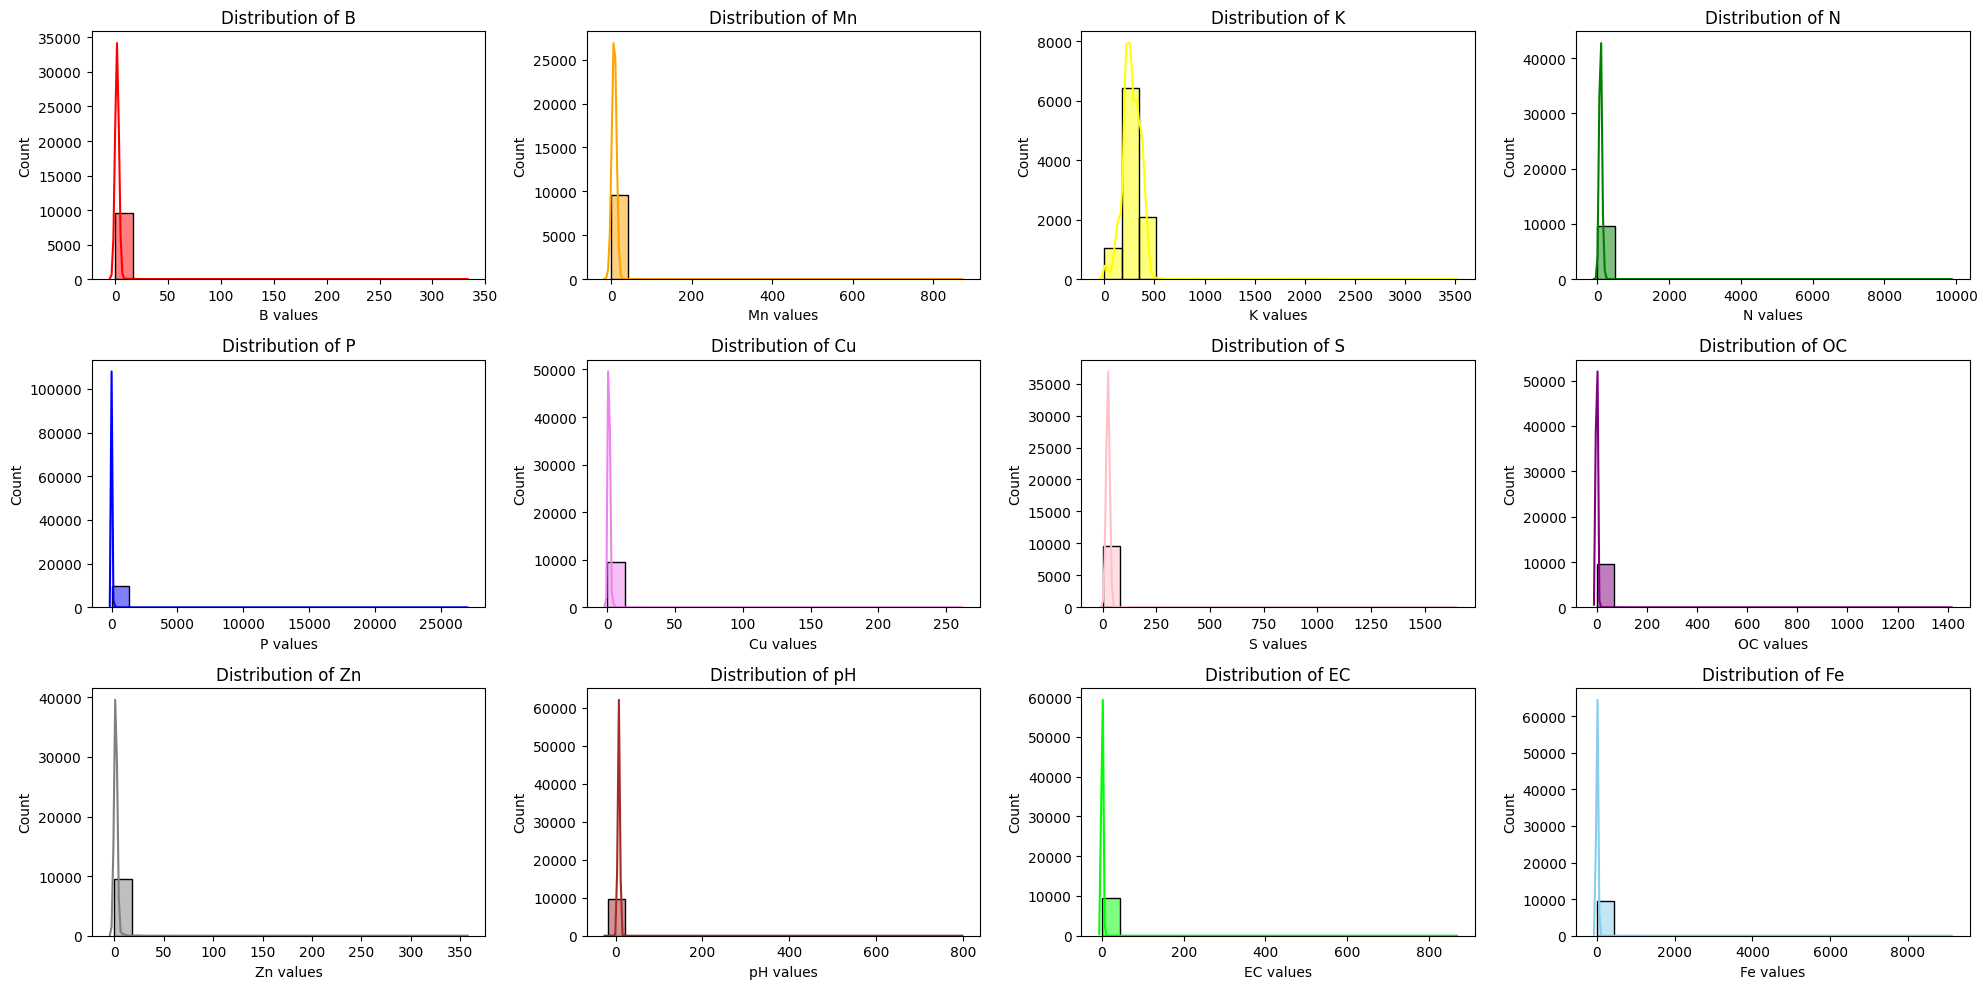

B min and max values :  Min = 0.05, Max = 3.11
Mn min and max values :  Min = 3.18, Max = 12.68
K min and max values :  Min = 0.269, Max = 548.0
N min and max values :  Min = 37.12, Max = 157.5
P min and max values :  Min = 18.0, Max = 18.0
Cu min and max values :  Min = 0.72, Max = 1.64
S min and max values :  Min = 10.0, Max = 40.0
OC min and max values :  Min = 0.165, Max = 0.7
Zn min and max values :  Min = 0.74, Max = 1.66
pH min and max values :  Min = 7.02, Max = 9.91
EC min and max values :  Min = 0.135, Max = 1.09
Fe min and max values :  Min = 5.33, Max = 11.87


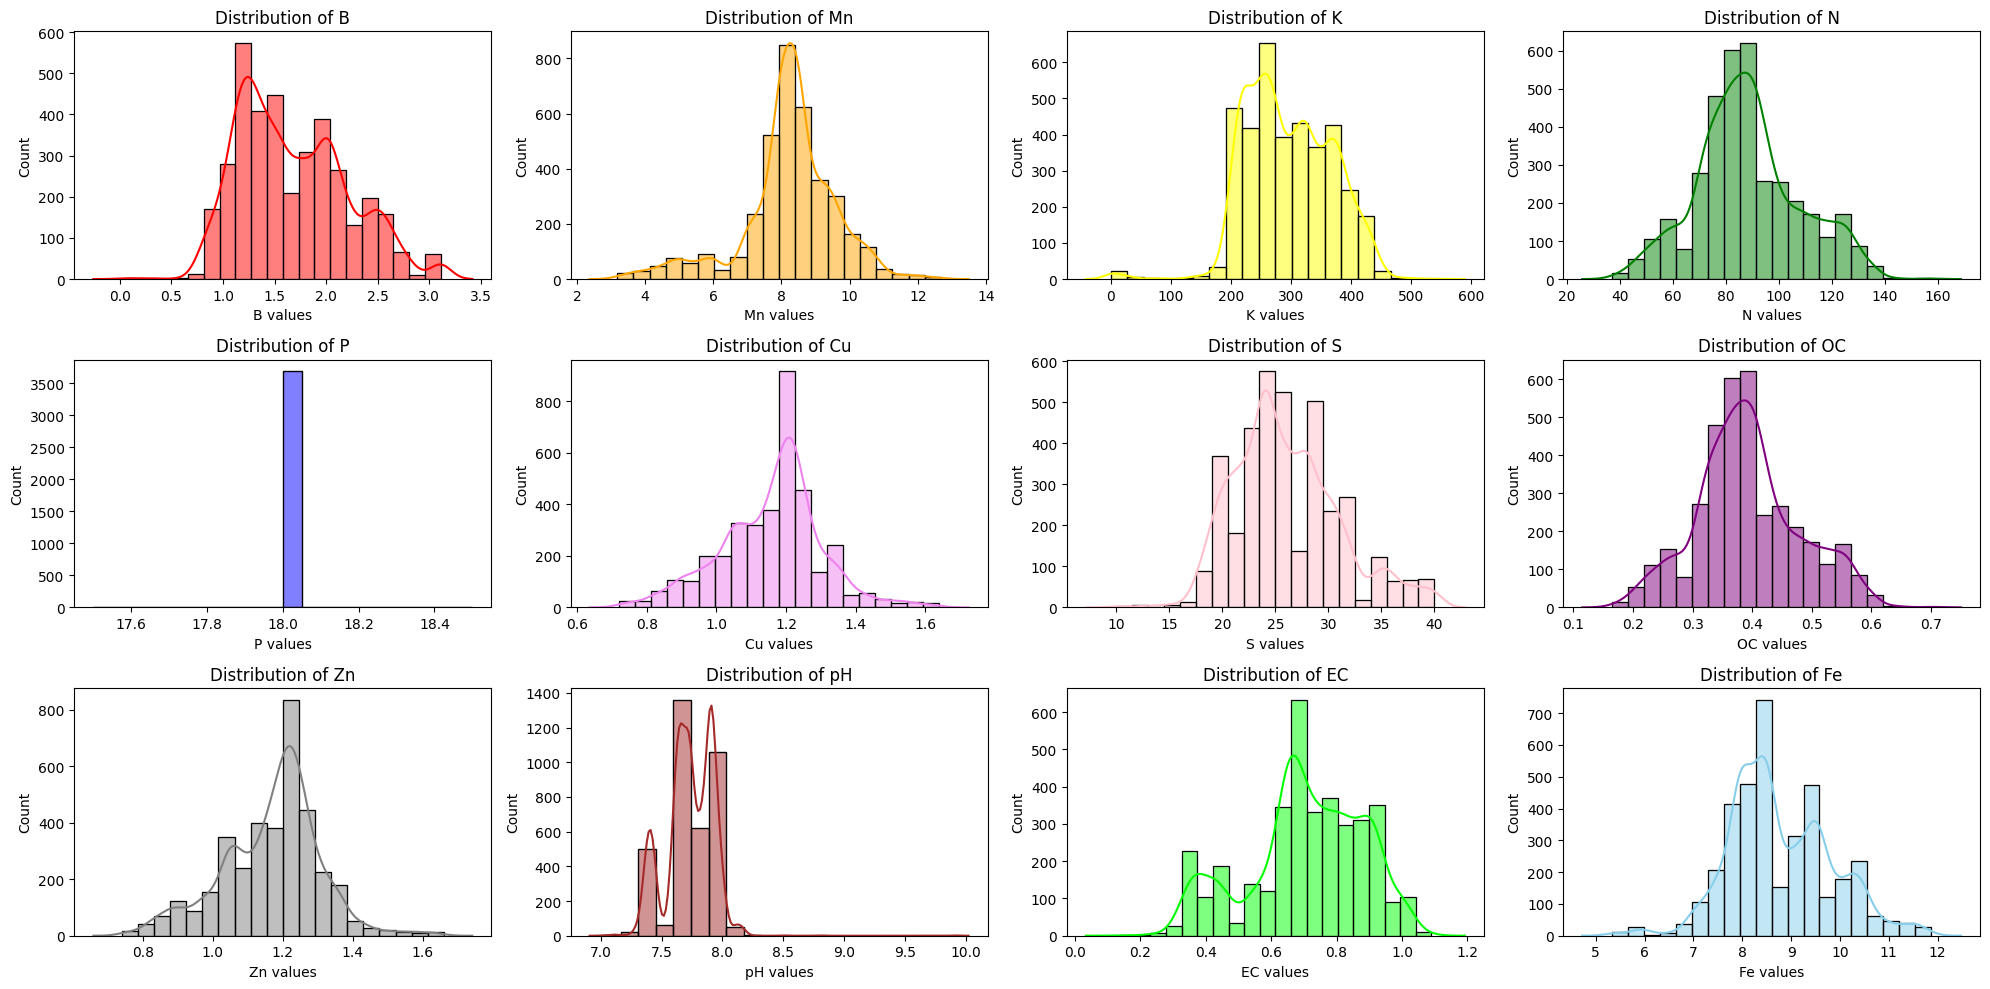

UNNAO_indices.csv saved in ./processed_data/UP_23_24
B min and max values :  Min = 0.0, Max = 1018.0
Mn min and max values :  Min = 0.45, Max = 100.0
K min and max values :  Min = 3.49, Max = 4103.2
N min and max values :  Min = 3.65, Max = 1693.3
P min and max values :  Min = 1.5, Max = 268.8
Cu min and max values :  Min = 0.04, Max = 12.0
S min and max values :  Min = 0.42, Max = 2080.0
OC min and max values :  Min = -1.0, Max = 205.4
Zn min and max values :  Min = -2.0, Max = 360.0
pH min and max values :  Min = -17.4, Max = 27.3
EC min and max values :  Min = -1.0, Max = 9.0
Fe min and max values :  Min = 0.59, Max = 1078.0


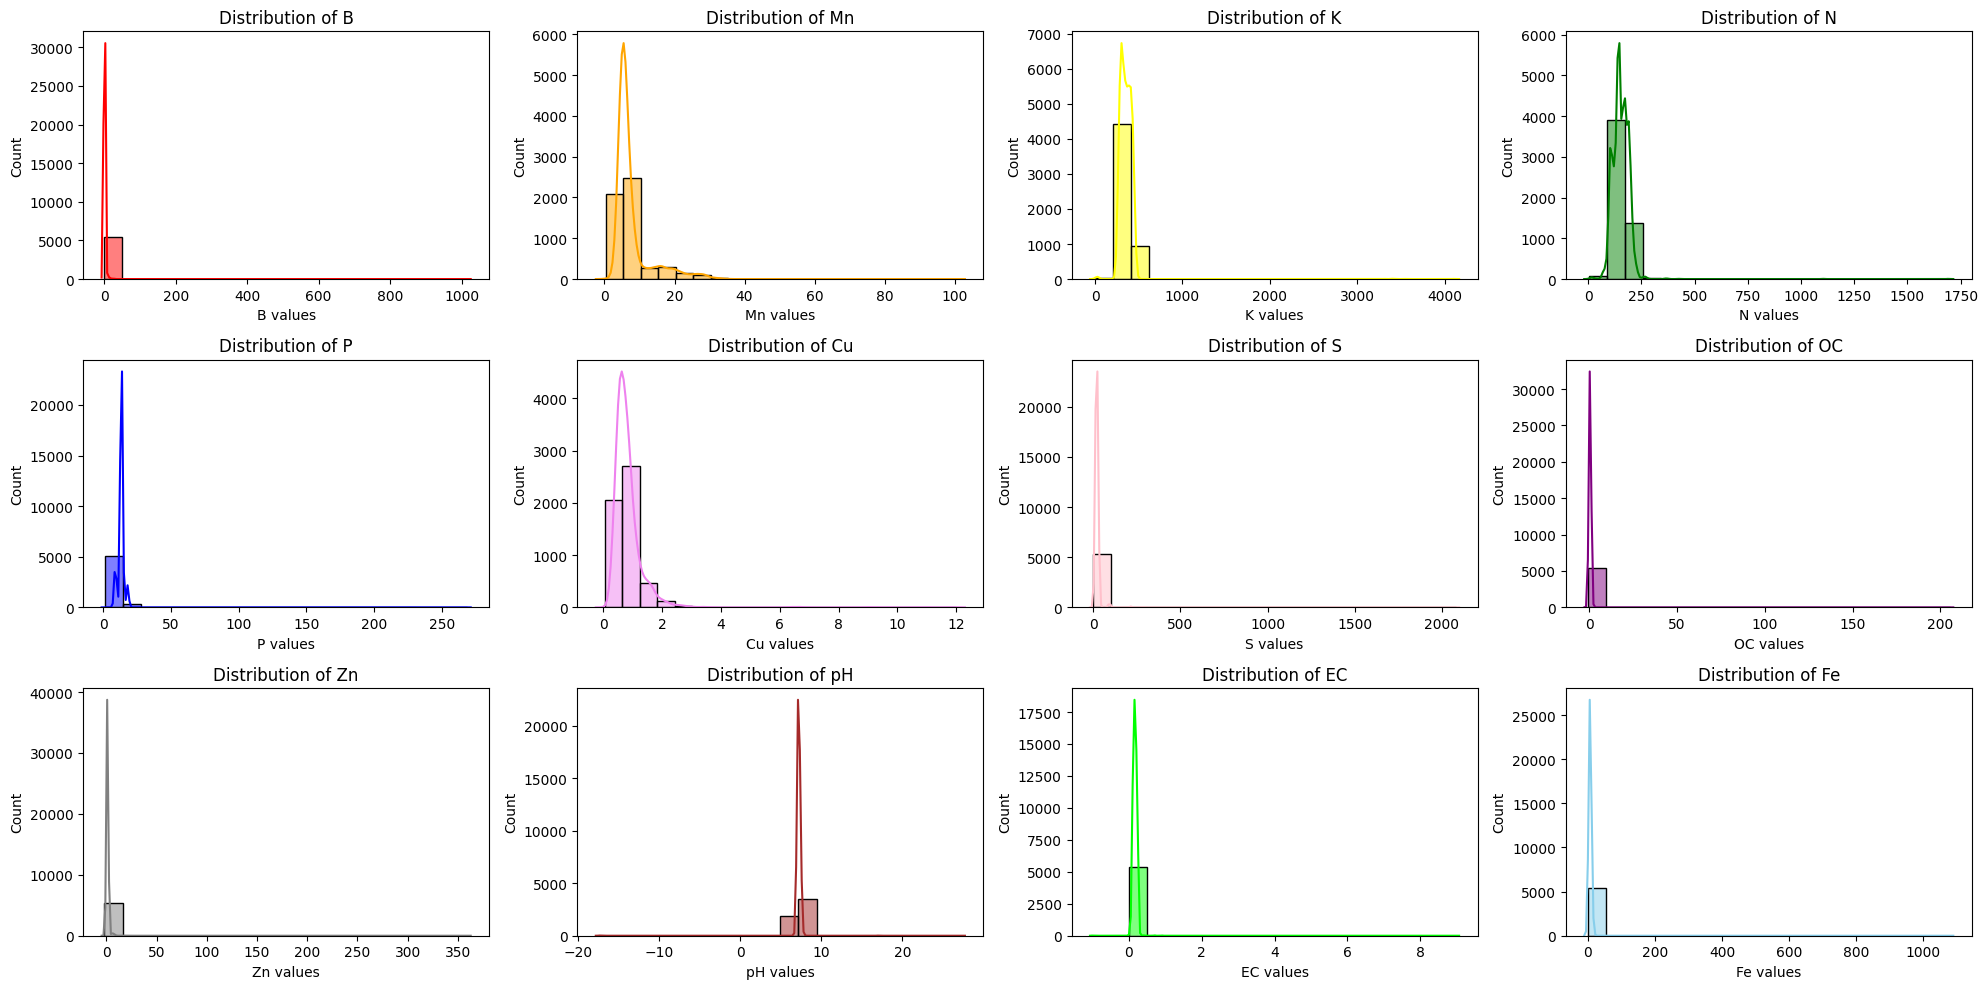

B min and max values :  Min = 0.0, Max = 1.85
Mn min and max values :  Min = 0.45, Max = 11.05
K min and max values :  Min = 128.3, Max = 483.5
N min and max values :  Min = 14.5, Max = 205.9
P min and max values :  Min = 13.5, Max = 13.5
Cu min and max values :  Min = 0.04, Max = 1.46
S min and max values :  Min = 9.52, Max = 31.2
OC min and max values :  Min = 0.13, Max = 0.52
Zn min and max values :  Min = 0.24, Max = 1.5
pH min and max values :  Min = 7.0, Max = 8.0
EC min and max values :  Min = 0.0, Max = 0.29
Fe min and max values :  Min = 0.98, Max = 12.5


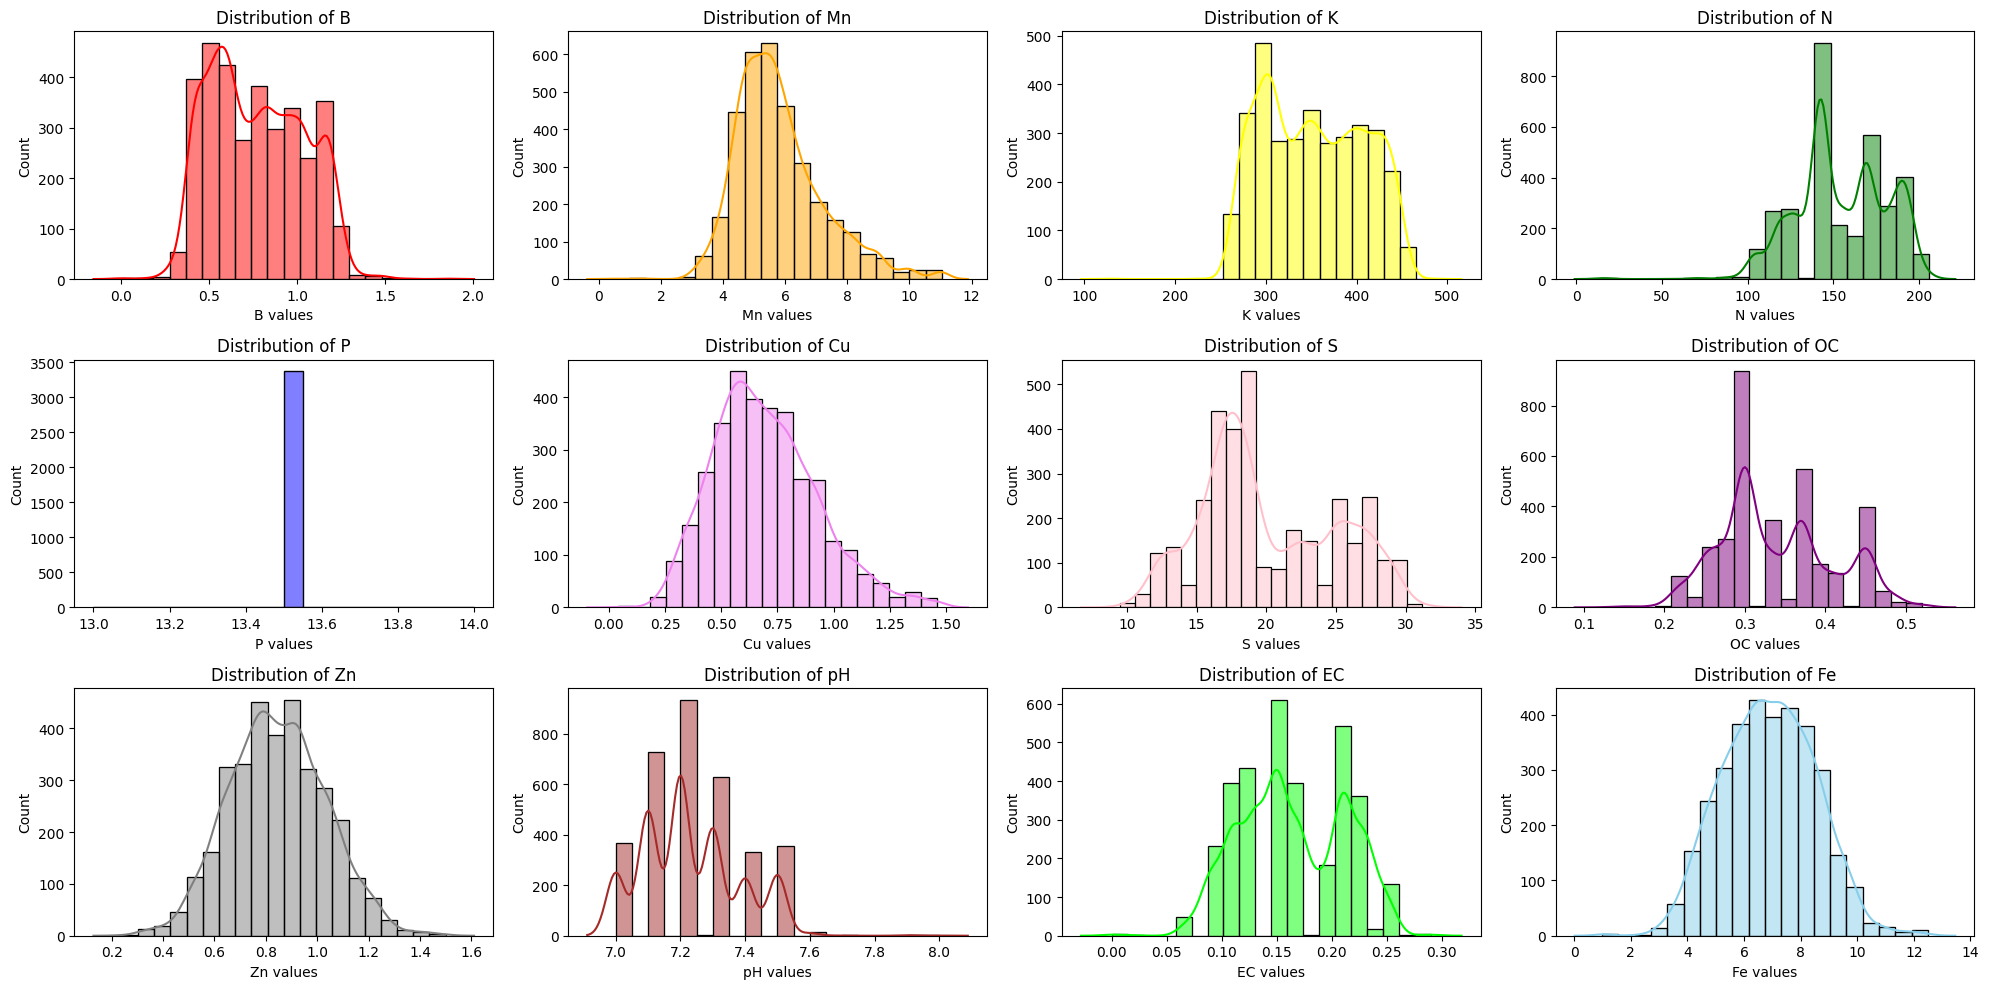

JALAUN_indices.csv saved in ./processed_data/UP_23_24


In [51]:
from tqdm.auto import tqdm

PARENT_FOLDER = "./processed_data"
STATE_FOLDER = "UP_23_24"

OUTPUT_FOLDER = os.path.join(PARENT_FOLDER, STATE_FOLDER)

files = os.listdir(OUTPUT_FOLDER)
for file in tqdm(files):
    if file.endswith(".csv"):
        file_path = os.path.join(OUTPUT_FOLDER, file)
        df = pd.read_csv(file_path)
        plot_props(df)
        df = apply_z_filter(df)
        plot_props(df)
        df.to_csv(file_path, index=False)
        print(f"{file} saved in {OUTPUT_FOLDER}")

In [ ]:
# UNNAO, JALAUN

In [47]:
file_path = "./processed_data/UP_23_24/UNNAO_indices.csv" # UNNAO, JALAUN
df = pd.read_csv(file_path)
df.head()

NDVI      EVI      NDWI      SAVI           BI        SI        HI  \
0  0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
1  0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
2  0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
3  0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
4  0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   

         CI            RI      TGSI  ...    Cu     S     OC    Zn  district  \
0  0.002388  4.610107e-07 -0.060484  ...  1.22  24.0  0.465  1.05     UNNAO   
1  0.002388  4.610107e-07 -0.060484  ...  1.06  20.0  0.345  1.05     UNNAO   
2  0.002388  4.610107e-07 -0.060484  ...  1.32  35.0  0.420  1.24     UNNAO   
3  0.002388  4.610107e-07 -0.060484  ...  0.92  24.0  0.390  1.07     UNNAO   
4  0.002388  4.610107e-07 -0.060484  ...  1.05  24.0  0.555  1.22     UNNAO   

     pH             village     EC     Fe  longitude  
0  7.98              Kotwar  0.613   7.55  80.830686  
1  7.73     Bahraura Bujurg  0.463   9.05  80.783503  
2  7.37  Bhikhari Pur Kasba  0.982  11.23  80.217400  
3  7.90  Bhikhari Pur Kasba  0.772  10.95  80.217400  
4  7.43         Mahamud Pur  0.362   7.92  80.318995  

[5 rows x 35 columns]

B min and max values :  Min = 0.01, Max = 328.0
Mn min and max values :  Min = 0.02, Max = 856.0
K min and max values :  Min = 0.112, Max = 3466.0
N min and max values :  Min = 0.11137, Max = 9787.0
P min and max values :  Min = 0.135, Max = 26918.0
Cu min and max values :  Min = 0.02, Max = 260.0
S min and max values :  Min = 0.23, Max = 1634.0
OC min and max values :  Min = 0.05, Max = 1405.0
Zn min and max values :  Min = 0.018, Max = 353.0
pH min and max values :  Min = -17.84, Max = 790.0
EC min and max values :  Min = 0.1006, Max = 862.0
Fe min and max values :  Min = 0.22, Max = 9055.0


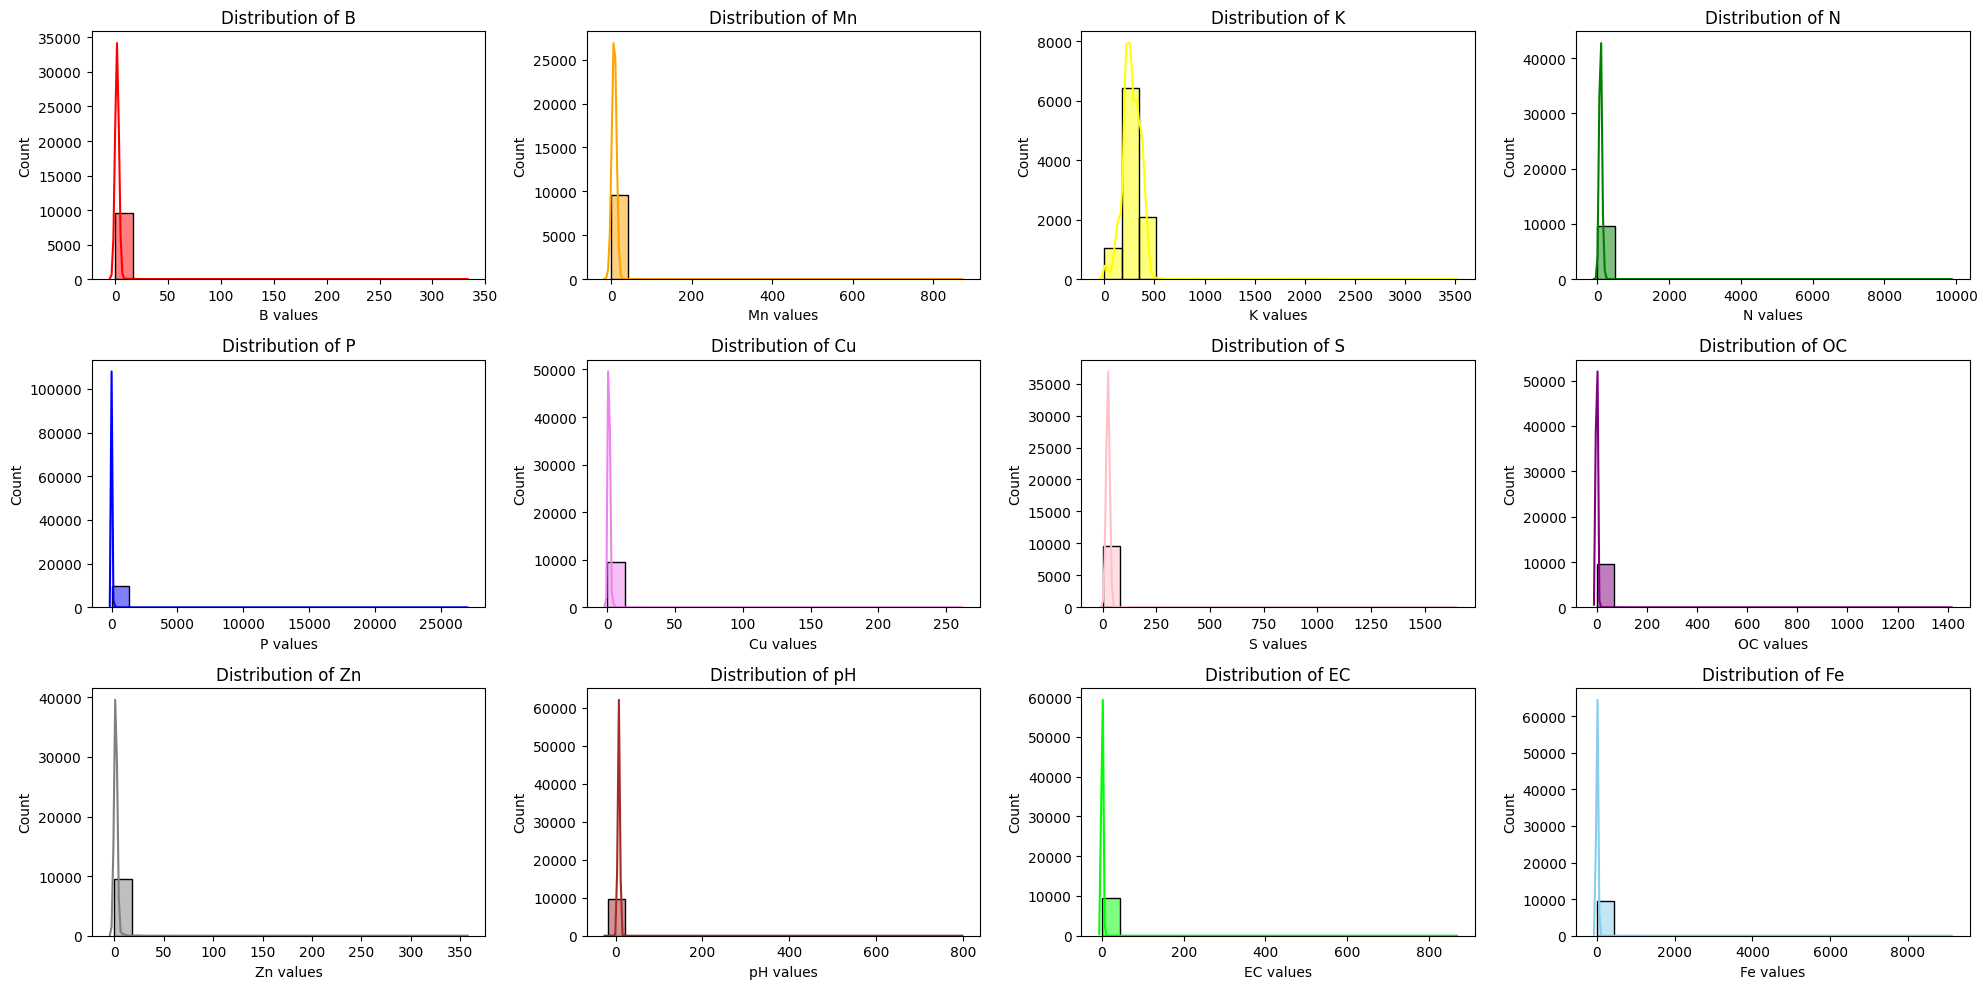

In [48]:
plot_props(df)

In [49]:
df = apply_z_filter(df)
df.head()

NDVI      EVI      NDWI      SAVI           BI        SI        HI  \
1   0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
4   0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
9   0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
10  0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   
11  0.314003  0.21451 -0.316754  0.470965  6546.068359  0.116554  0.653798   

          CI            RI      TGSI  ...    Cu     S     OC    Zn  district  \
1   0.002388  4.610107e-07 -0.060484  ...  1.06  20.0  0.345  1.05     UNNAO   
4   0.002388  4.610107e-07 -0.060484  ...  1.05  24.0  0.555  1.22     UNNAO   
9   0.002388  4.610107e-07 -0.060484  ...  1.26  21.0  0.390  1.26     UNNAO   
10  0.002388  4.610107e-07 -0.060484  ...  1.18  24.0  0.510  1.22     UNNAO   
11  0.002388  4.610107e-07 -0.060484  ...  1.20  25.0  0.255  1.20     UNNAO   

      pH          village     EC    Fe  longitude  
1   7.73  Bahraura Bujurg  0.463  9.05  80.783503  
4   7.43      Mahamud Pur  0.362  7.92  80.318995  
9   7.82           Dilwal  0.795  7.92  80.509634  
10  7.40       Pathak Pur  0.430  7.92  80.827225  
11  7.64           Pesari  0.696  7.92  80.369323  

[5 rows x 35 columns]

B min and max values :  Min = 0.05, Max = 3.11
Mn min and max values :  Min = 3.18, Max = 12.68
K min and max values :  Min = 0.269, Max = 548.0
N min and max values :  Min = 37.12, Max = 157.5
P min and max values :  Min = 18.0, Max = 18.0
Cu min and max values :  Min = 0.72, Max = 1.64
S min and max values :  Min = 10.0, Max = 40.0
OC min and max values :  Min = 0.165, Max = 0.7
Zn min and max values :  Min = 0.74, Max = 1.66
pH min and max values :  Min = 7.02, Max = 9.91
EC min and max values :  Min = 0.135, Max = 1.09
Fe min and max values :  Min = 5.33, Max = 11.87


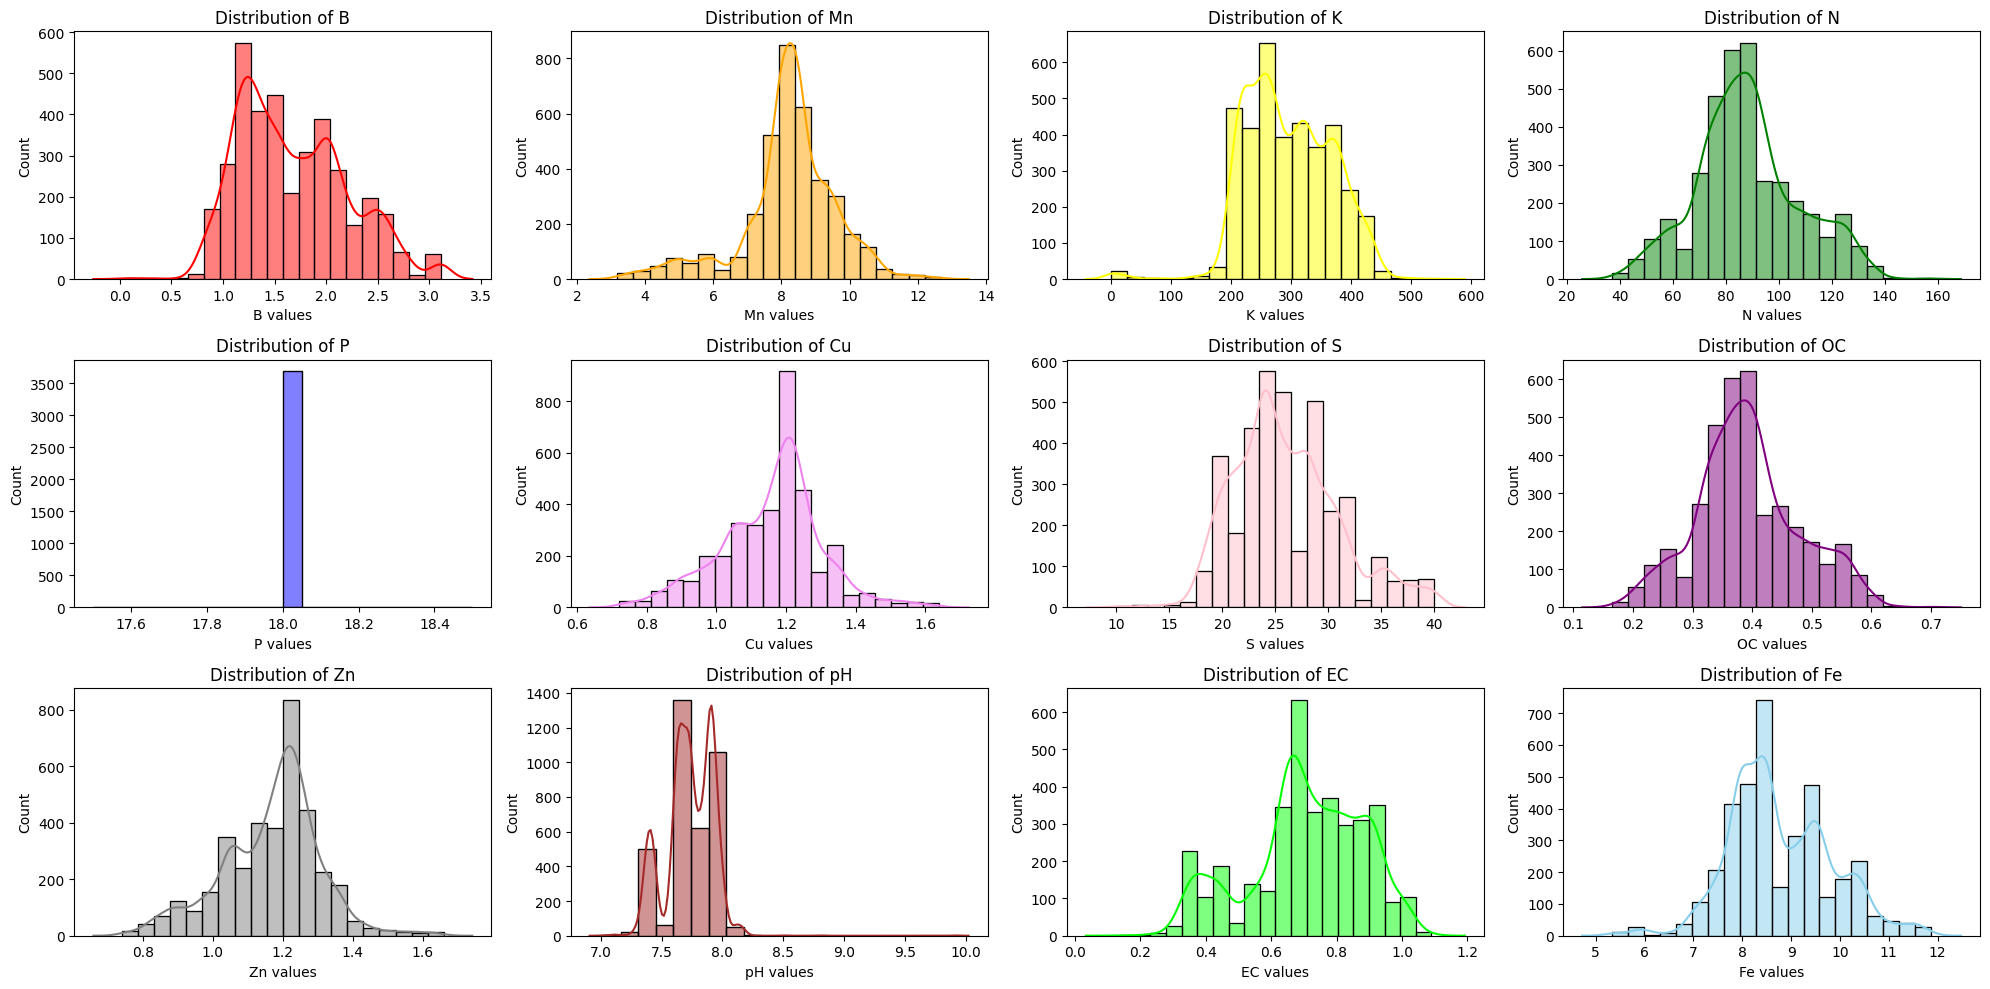

In [50]:
plot_props(df)

In [8]:
# df.to_csv("BAGHPAT_filtered_indices.csv", index=False)